In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Data import and processing
All the data used from the application to the Regional Statistics compendium by Russian statistical service https://rosstat.gov.ru/folder/210/document/47652

Direct link to the download (.rar): https://rosstat.gov.ru/storage/mediabank/pril-region2021.rar



##Functions

In [ ]:
def loc_missings(df: pd.DataFrame):
  '''
  Locates string values in a dataframe
  Returns list of strings
  '''
  missings = set()
  for x in range(1, len(df.columns)):
    for value in df.iloc[:, x]:
      if isinstance(value, str):
        missings.add(value)
  return list(missings)

In [ ]:
from sklearn.impute import SimpleImputer

def impute(df: pd.DataFrame, missings: list):
  '''
  Takes pd.DataFrame and list of missing values
  Fills NA with 0
  Fills missing values with 0
  '''

  df.fillna(0, inplace=True)

  for element in missings:
    imputer = SimpleImputer(missing_values=element, strategy='constant', fill_value=0)
    imputer.fit(df)
    df = imputer.transform(df)
  
  df = pd.DataFrame(df)
  return df

##Industry production amount

Fact prices, million rubles

In [ ]:
gross_industry_2000_2004 = pd.read_excel('/content/drive/MyDrive/research/stats/industry/gross industry.xlsx', header=None)

In [ ]:
gross_industry_2000_2004.head()

,0,1,2,3,4,5
0,12.1. Объем промышленной продукции в 2000-2004...,NaN,NaN,NaN,NaN,NaN
1,(в соответствии с ОКОНХ; в фактически действов...,NaN,NaN,NaN,NaN,NaN
2,NaN,2000,2001,2002,2003,2004
3,Российская Федерация,4762522,5880997,6867871,8498058,11209107
4,Центральный\nфедеральный округ,819844,1078500,1348681,1643534,2090299


In [ ]:
gross_industry_2000_2004.shape

(101, 6)

In [ ]:
gross_industry_2000_2004.drop(index=[0, 1], inplace=True)

In [ ]:
gross_industry_2000_2004.iloc[0, 0] = 'region_name'

In [ ]:
industry_mining = pd.read_excel('/content/drive/MyDrive/research/stats/industry/mining.xlsx', header=None)

In [ ]:
industry_mining.shape

(102, 17)

In [ ]:
industry_mining.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,12.2. ОБЪЕМ ОТГРУЖЕННЫХ ТОВАРОВ СОБСТВЕННОГО П...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.2.1. «Добыча полезных ископаемых» в соответ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(в фактически действовавших ценах; миллионов р...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2005,2006,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016,2017,2018,2019,2020
4,Российская Федерация,3062460,3720887,4488915.0,5271733.0,5090973.0,6217952.0,8020217.0,8950066.0,9213745.0,9690978.0,11259542.0,11730498,13916165,18193870,18324127,14498900


In [ ]:
industry_mining.drop(index=[0, 1, 2], inplace=True)

In [ ]:
industry_mining.iloc[0, 0] = 'region_name'

In [ ]:
industry_mining

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
3,region_name,2005,2006,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016,2017,2018,2019,2020
4,Российская Федерация,3062460,3720887,4488915.0,5271733.0,5090973.0,6217952.0,8020217.0,8950066.0,9213745.0,9690978.0,11259542.0,11730498,13916165,18193870,18324127,14498900
5,Центральный\nфедеральный округ,76390,184869,541418.0,590703.0,548343.0,623877.0,833562.0,892151.0,985154.0,901805.0,1052128.0,1144558,1502691,2099611,2102477,1443869
6,Белгородская область,40390,41102,56923.0,62221.0,35375.0,73704.0,110158.0,94390.0,96017.0,84223.0,81211.0,88930,116588,148863,178390,189804
7,Брянская область,136,142,160.0,158.0,172.0,248.0,370.0,409.0,388.0,433.0,425.0,281,277,262,338,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Амурская область,7942,9577,10649.0,15132.0,23995.0,26599.0,49973.0,53473.0,49747.0,55690.0,72180.0,64379,64359,60169,82506,116723
98,Магаданская область,14883,14755,13718.0,15757.0,20871.0,29546.0,41815.0,59256.0,53178.0,61790.0,83196.0,106564,112749,124937,29146,…2)
99,Сахалинская область,35817,57863,198687.0,217105.0,267746.0,353836.0,502527.0,539776.0,558867.0,736034.0,708683.0,597755,693852,1016799,942671,731920
100,Еврейская автономная область,220,187,453.0,308.0,216.0,286.0,402.0,398.0,414.0,720.0,974.0,1227,7593,10330,13972,…2)


In [ ]:
industry_processing = pd.read_excel('/content/drive/MyDrive/research/stats/industry/processing industries.xlsx', header=None)

In [ ]:
industry_processing.shape

(102, 17)

In [ ]:
industry_processing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,12.2. ОБЪЕМ ОТГРУЖЕННЫХ ТОВАРОВ СОБСТВЕННОГО П...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.2.3. «Обрабатывающие производства» в соотве...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(в фактически действовавших ценах; миллионов р...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2005,2006,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
4,Российская Федерация,8871976,11185374,13977777.0,16863615.0,14351985.0,18880737.0,22813279.0,25110611.0,26839760.0,29661252.0,35090428.0,36119929.0,38712463.0,44599512.0,47436025.0,47782550.0


In [ ]:
industry_processing.drop(index=[0, 1, 2], inplace=True)

In [ ]:
industry_processing.iloc[0, 0] = 'region_name'

In [ ]:
industry_electricity = pd.read_excel('/content/drive/MyDrive/research/stats/industry/electricity.xlsx', header=None)

In [ ]:
industry_electricity.shape

(102, 17)

In [ ]:
industry_electricity.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,12.2. ОБЪЕМ ОТГРУЖЕННЫХ ТОВАРОВ СОБСТВЕННОГО П...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.2.5. «Производство и распределение электроэ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(в фактически действовавших ценах; миллионов р...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2005,2006,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
4,Российская Федерация,1690656,2162207,2145668.0,2572988.0,3030165.0,3665280.0,4219137.0,4160147.0,4491574.0,4712009.0,4917677.0,5332278.0,5379682.0,5641920.0,5805454.0,5959974.0


In [ ]:
industry_electricity.drop(index=[0, 1, 2], inplace=True)

In [ ]:
industry_electricity.iloc[0, 0] = 'region_name'

In [ ]:
industry_mining.shape

(99, 17)

In [ ]:
industry_mining.iloc[3:, 1] + industry_electricity.iloc[3:, 1] + industry_processing.iloc[3:, 1]

6      156830
7       44938
8       94794
9       94013
10      39213
        ...  
97      31815
98      21610
99      54459
100      3363
101      6422
Name: 1, Length: 96, dtype: object

###Imputing missing values

In [ ]:
industry_mining_missings = loc_missings(industry_mining)
print(industry_mining_missings)

['… ', '…2)', '…']


In [ ]:
industry_mining = impute(df=industry_mining, missings=industry_mining_missings)

In [ ]:
industry_processing_missings = loc_missings(industry_processing)
print(industry_processing_missings)

['…']


In [ ]:
industry_processing = impute(df=industry_processing, missings=industry_processing_missings)

In [ ]:
industry_electricity_missings = loc_missings(industry_electricity)
print(industry_electricity_missings)

['…']


In [ ]:
industry_electricity = impute(df=industry_electricity, missings=industry_electricity_missings)

###Sum up mining, processing, electricity into 1 dataframe and join with gross_industry_2000_2004

In [ ]:
gross_industry_2005_2020 = pd.DataFrame()
gross_industry_2005_2020[0] = industry_mining.iloc[:, 0]

for i in range(1, 17):
  #gross_industry_2005_2020[industry_mining.iloc[0, i]] = industry_mining.iloc[1:, i] + industry_electricity.iloc[1:, i] + industry_processing.iloc[1:, i]
  
  gross_industry_2005_2020[i] = industry_mining.iloc[1:, i] + industry_electricity.iloc[1:, i] + industry_processing.iloc[1:, i]
  gross_industry_2005_2020.iloc[0, i] = int(industry_mining.iloc[0, i])

In [ ]:
gross_industry_2005_2020

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,region_name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Российская Федерация,13625092,17068468,20612360.0,24708336.0,22473123.0,28763969.0,35052633.0,38220824.0,40545079.0,44064239.0,51267647.0,53182705.0,58008310.0,68435302.0,71565606.0,68241424.0
2,Центральный\nфедеральный округ,3156370,4310750,5613306.0,6657028.0,5952106.0,7507315.0,8991139.0,9645714.0,10881743.0,12078080.0,14354798.0,15544748.0,16390845.0,18952361.0,20466105.0,20763466.0
3,Белгородская область,156830,194784,264865.0,350134.0,295771.0,415765.0,504377.0,528979.0,529352.0,581828.0,672848.0,721036.0,772712.0,886497.0,927633.0,962972.0
4,Брянская область,44938,55083,68090.0,82119.0,68560.0,87070.0,106362.0,124566.0,128959.0,140734.0,187525.0,192668.0,207360.0,236536.0,271709.0,273873.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Амурская область,31815,35861,38751.0,46798.0,60866.0,72102.0,96691.0,102413.0,99246.0,109392.0,138603.0,125937.0,131541.0,131306.0,166704.3,198816.9
95,Магаданская область,21610,22352,22012.0,25038.0,31059.0,40650.0,55419.0,73550.0,68950.0,77486.0,98983.0,125151.0,131757.0,145461.0,194590.1,228005.2
96,Сахалинская область,54459,79422,224224.0,246406.0,302204.0,391495.0,542903.0,583830.0,605316.0,795302.0,774123.0,674179.0,762159.0,1095162.0,1029503.3,817729.0
97,Еврейская автономная область,3363,3657,5183.0,6110.0,5343.0,6150.0,5975.0,7060.0,7484.0,9453.0,10475.0,10756.0,18545.0,21417.0,25352.6,10427.5


In [ ]:
gross_industry_2000_2004

,0,1,2,3,4,5
2,region_name,2000,2001,2002,2003,2004
3,Российская Федерация,4762522,5880997,6867871,8498058,11209107
4,Центральный\nфедеральный округ,819844,1078500,1348681,1643534,2090299
5,Белгородская область,41426,50941,61603,80588,120778
6,Брянская область,14509,18660,22018,28180,35200
...,...,...,...,...,...,...
96,Амурская область,8878,11704,15346,20447,23640
97,Магаданская область,10728,12334,17877,18148,19776
98,Сахалинская область,30166,32892,31336,37252,41152
99,Еврейская автономная область,1172,1269,1676,2383,2512


In [ ]:
gross_industry_2000_2004.reset_index(inplace=True, drop=True)

In [ ]:
(gross_industry_2000_2004[0] == gross_industry_2005_2020[0]).sum()

99

In [ ]:
print(f'Shape of 2000_2004: {gross_industry_2000_2004.shape}')
print(f'Shape of 2005_2020: {gross_industry_2005_2020.shape}')

Shape of 2000_2004: (99, 6)
Shape of 2005_2020: (99, 17)


In [ ]:
gross_industry_2005_2020.drop(0, axis=1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,13625092,17068468,20612360.0,24708336.0,22473123.0,28763969.0,35052633.0,38220824.0,40545079.0,44064239.0,51267647.0,53182705.0,58008310.0,68435302.0,71565606.0,68241424.0
2,3156370,4310750,5613306.0,6657028.0,5952106.0,7507315.0,8991139.0,9645714.0,10881743.0,12078080.0,14354798.0,15544748.0,16390845.0,18952361.0,20466105.0,20763466.0
3,156830,194784,264865.0,350134.0,295771.0,415765.0,504377.0,528979.0,529352.0,581828.0,672848.0,721036.0,772712.0,886497.0,927633.0,962972.0
4,44938,55083,68090.0,82119.0,68560.0,87070.0,106362.0,124566.0,128959.0,140734.0,187525.0,192668.0,207360.0,236536.0,271709.0,273873.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,31815,35861,38751.0,46798.0,60866.0,72102.0,96691.0,102413.0,99246.0,109392.0,138603.0,125937.0,131541.0,131306.0,166704.3,198816.9
95,21610,22352,22012.0,25038.0,31059.0,40650.0,55419.0,73550.0,68950.0,77486.0,98983.0,125151.0,131757.0,145461.0,194590.1,228005.2
96,54459,79422,224224.0,246406.0,302204.0,391495.0,542903.0,583830.0,605316.0,795302.0,774123.0,674179.0,762159.0,1095162.0,1029503.3,817729.0
97,3363,3657,5183.0,6110.0,5343.0,6150.0,5975.0,7060.0,7484.0,9453.0,10475.0,10756.0,18545.0,21417.0,25352.6,10427.5


In [ ]:
gross_industry = gross_industry_2000_2004.join(gross_industry_2005_2020.drop(0, axis=1), rsuffix='_')

In [ ]:
gross_industry.columns=[i for i in range(len(gross_industry.columns))]

In [ ]:
gross_industry.drop(gross_industry[gross_industry[0].str.contains('федеральный')].index.tolist(), inplace=True)

In [ ]:
gross_industry.drop(gross_industry[gross_industry[0].str.contains('том')].index.tolist(), inplace=True)

In [ ]:
gross_industry.fillna(0, inplace=True)

##Export cis and foreign

Million dollars

In [ ]:
export_foreign = pd.read_excel('/content/drive/MyDrive/research/stats/export/export_non_neghbor_countries.xlsx', header=None)
export_cis = pd.read_excel('/content/drive/MyDrive/research/stats/export/export_cis.xlsx', header=None)

In [ ]:
export_cis.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,21.2. ВНЕШНЯЯ ТОРГОВЛЯ СО СТРАНАМИ СНГ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21.2.1. Экспорт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(в фактически действовавших ценах; миллионов д...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017.000000,2018,2019,2020
4,Российская Федерация,13823.6,14617.4,15608.8,20498,29386,32627,42310,52652,69656,...,79435,78107,73940,64186,45092,37966,48079.377193,54888.7,53955.4,48592.4


In [ ]:
export_cis.drop(index=[0, 1, 2], inplace=True)
export_cis.iloc[0, 0] = 'region_name'
export_cis.reset_index(drop=True, inplace=True)

In [ ]:
export_foreign.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,21.1. ВНЕШНЯЯ ТОРГОВЛЯ СО СТРАНАМИ ДАЛЬНЕГО ЗА...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21.1.1. Экспорт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(в фактически действовавших ценах; миллионов д...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2000,2001,2002,2003,2004,2005.0,2006.0,2007.0,2008.0,...,2011,2012,2013,2014.0,2015.0,2016.0,2017,2018,2019.0,2020.0
4,Российская Федерация,89269.2,85352.2,90545.5,113157,152248,208846.0,259145.0,299267.0,397925.0,...,437283,447277,452036,433173.0,298420.0,247687.0,309687.472739,394674.9,370512.2,288512.9


In [ ]:
export_foreign.drop(index=[0, 1, 2], inplace=True)
export_foreign.iloc[0, 0] = 'region_name'
export_foreign.reset_index(drop=True, inplace=True)

In [ ]:
export_cis

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,region_name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017.000000,2018,2019,2020
1,Российская Федерация,13823.6,14617.4,15608.8,20498,29386,32627,42310,52652,69656,...,79435,78107,73940,64186,45092,37966,48079.377193,54888.7,53955.4,48592.4
2,Центральный федеральный округ,3355.1,3516.5,3345,3525.2,7149.2,7429.6,9646.5,9974,15619.7,...,21277.4,37955.1,37871.6,34299.3,21034.8,18149.2,23646.739407,26657.8,26699.1,23278.5
3,Белгородская область,237.6,371,176.8,265,331.9,488,595.1,858.7,1267.4,...,950.8,1095.3,1060.3,826.4,544.2,579.2,761.995562,892.6,929.8,811.3
4,Брянская область,34.7,41.3,38.6,53.9,57.3,98.7,98.2,158,126,...,124.4,389,300.8,275.5,249.9,152.7,191.736963,231.8,259.3,222.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Амурская область,0.1,-,0.1,0.1,0.8,0.4,0.5,0.6,1.9,...,0.2,0.7,4.2,0.2,0.8,0.7,1.331098,2.9,7,2.1
95,Магаданская область,0.1,-,0.1,-,-,0,0.2,0.2,0,...,0.8,-,130.7,152.8,189.4,187.1,166.006813,171.2,213.5,250.3
96,Сахалинская область,1.5,0.9,0.1,0,3.2,1.3,0.1,1.9,2.3,...,0.4,0.8,0.7,0.4,1,0.4,0.497296,1.7,1.5,1.3
97,Еврейская автономная область,0,-,0,0.1,0.3,0.1,0.3,0,0.9,...,-,0.1,0.4,0.7,0.3,0,0.044297,0.4,0.5,0.7


In [ ]:
export_foreign

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,region_name,2000,2001,2002,2003,2004,2005.0,2006.0,2007.0,2008.0,...,2011,2012,2013,2014.0,2015.0,2016.0,2017,2018,2019.0,2020.0
1,Российская Федерация,89269.2,85352.2,90545.5,113157,152248,208846.0,259145.0,299267.0,397925.0,...,437283,447277,452036,433173.0,298420.0,247687.0,309687.472739,394674.9,370512.2,288512.9
2,Центральный федеральный округ,28905.8,28572.7,28423.7,34452.7,59400.2,89010.0,113267.6,135452.4,186363.9,...,189595.3,199702.8,218273.8,221053.3,147841.1,119139.8,151268.453931,199099,184920.1,140140.6
3,Белгородская область,298.8,348.4,331,448.6,649.5,930.1,1013.9,1461.7,2502.7,...,2889.2,2537.5,2354.4,2349.7,1881.9,1606.5,2028.013029,2446.9,2335.1,2332.8
4,Брянская область,46,75.6,126.1,45.8,387.1,161.7,64.5,525.0,203.2,...,67.2,50.2,59.5,87.2,102.1,61.7,80.806632,94.1,128.9,156.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Амурская область,58.3,96.4,70.7,76.1,98.8,164.3,156.3,208.8,270.3,...,234.6,406.8,442.2,383.2,397.8,339.5,307.46925,368.9,473.4,645.0
95,Магаданская область,3.7,2.8,6.3,7.7,25.2,19.9,19.8,117.0,128.4,...,196.2,195.4,298.6,309.3,141.5,228.6,238.995538,236,250.1,206.9
96,Сахалинская область,423.8,330.3,636.2,646,704.6,1061.4,1037.3,7035.9,8590.0,...,16010.5,16366.9,17008.8,16696.3,11582.7,8998.3,10574.093944,15271,15186.7,11322.5
97,Еврейская автономная область,12.1,16.7,8.1,8.3,5.1,8.3,11.4,18.0,21.6,...,11.3,15.9,17.5,22.8,37.0,34.5,119.157974,149.2,117.9,197.6


In [ ]:
export_cis_missings = loc_missings(export_cis)
print(f'Missings from export_cis: {export_cis_missings}')

Missings from export_cis: ['...', '-', '0,0\xa0', '…']


In [ ]:
export_foreign_missings = loc_missings(export_foreign)
print(f'Missings from export_foreign: {export_foreign_missings}')

Missings from export_foreign: ['-\xa0', '-', '…']


In [ ]:
export_cis = impute(df=export_cis, missings=export_cis_missings)

In [ ]:
export_foreign = impute(df=export_foreign, missings=export_foreign_missings)

In [ ]:
print(f'Shape of export_cis: {export_cis.shape}')
print(f'Shape of export_foreign: {export_foreign.shape}')

Shape of export_cis: (99, 22)
Shape of export_foreign: (99, 22)


In [ ]:
tf = (export_cis[0] == export_foreign[0])
np.where(tf)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

In [ ]:
export_cis.iloc[21, 0]

'Северо-Западный      федеральный округ '

In [ ]:
export_foreign.iloc[21, 0]

'Северо-Западный федеральный округ '

In [ ]:
export_cis.iloc[35, 0]

'Южный              федеральный округ'

In [ ]:
export_foreign.iloc[35, 0]

'Южный  федеральный округ'

In [ ]:
export_foreign.shape[1]

22

In [ ]:
gross_export = pd.DataFrame()

gross_export[0] = export_foreign[0]

for i in range(1, export_foreign.shape[1]):
  gross_export[i] = export_cis.iloc[1:, i] + export_foreign.iloc[1:, i]
  gross_export.iloc[0, i] = int(export_foreign.iloc[0, i])

In [ ]:
gross_export

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,region_name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Российская Федерация,103092.8,99969.6,106154.3,133655,181634,241473.0,301455.0,351919.0,467581.0,...,516718,525384,525976,497359.0,343512.0,285653.0,357766.849932,449563.6,424467.6,337105.3
2,Центральный федеральный округ,32260.9,32089.2,31768.7,37977.9,66549.4,96439.6,122914.1,145426.4,201983.6,...,210872.7,237657.9,256145.4,255352.6,168875.9,137289.0,174915.193338,225756.8,211619.2,163419.1
3,Белгородская область,536.4,719.4,507.8,713.6,981.4,1418.1,1609.0,2320.4,3770.1,...,3840.0,3632.8,3414.7,3176.1,2426.1,2185.7,2790.00859,3339.5,3264.9,3144.1
4,Брянская область,80.7,116.9,164.7,99.7,444.4,260.4,162.7,683.0,329.2,...,191.6,439.2,360.3,362.7,352.0,214.4,272.543594,325.9,388.2,379.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Амурская область,58.4,96.4,70.8,76.2,99.6,164.7,156.8,209.4,272.2,...,234.8,407.5,446.4,383.4,398.6,340.2,308.800348,371.8,480.4,647.1
95,Магаданская область,3.8,2.8,6.4,7.7,25.2,19.9,20.0,117.2,128.4,...,197.0,195.4,429.3,462.1,330.9,415.7,405.002351,407.2,463.6,457.2
96,Сахалинская область,425.3,331.2,636.3,646,707.8,1062.7,1037.4,7037.8,8592.3,...,16010.9,16367.7,17009.5,16696.7,11583.7,8998.7,10574.59124,15272.7,15188.2,11323.8
97,Еврейская автономная область,12.1,16.7,8.1,8.4,5.4,8.4,11.7,18.0,22.5,...,11.3,16.0,17.9,23.5,37.3,34.5,119.202271,149.6,118.4,198.3


In [ ]:
gross_export.drop(gross_export[gross_export[0].str.contains('федеральный')].index.tolist(), inplace=True)

In [ ]:
gross_export.drop(gross_export[gross_export[0].str.contains('том')].index.tolist(), inplace=True)

In [ ]:
gross_export

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,region_name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Российская Федерация,103092.8,99969.6,106154.3,133655,181634,241473.0,301455.0,351919.0,467581.0,...,516718,525384,525976,497359.0,343512.0,285653.0,357766.849932,449563.6,424467.6,337105.3
3,Белгородская область,536.4,719.4,507.8,713.6,981.4,1418.1,1609.0,2320.4,3770.1,...,3840.0,3632.8,3414.7,3176.1,2426.1,2185.7,2790.00859,3339.5,3264.9,3144.1
4,Брянская область,80.7,116.9,164.7,99.7,444.4,260.4,162.7,683.0,329.2,...,191.6,439.2,360.3,362.7,352.0,214.4,272.543594,325.9,388.2,379.2
5,Владимирская область,101.1,116.2,147.5,205,188.1,236.6,253.9,463.1,467.0,...,904.5,812.9,950.2,980.9,670.4,633.7,670.394562,843.8,642.3,718.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Амурская область,58.4,96.4,70.8,76.2,99.6,164.7,156.8,209.4,272.2,...,234.8,407.5,446.4,383.4,398.6,340.2,308.800348,371.8,480.4,647.1
95,Магаданская область,3.8,2.8,6.4,7.7,25.2,19.9,20.0,117.2,128.4,...,197.0,195.4,429.3,462.1,330.9,415.7,405.002351,407.2,463.6,457.2
96,Сахалинская область,425.3,331.2,636.3,646,707.8,1062.7,1037.4,7037.8,8592.3,...,16010.9,16367.7,17009.5,16696.7,11583.7,8998.7,10574.59124,15272.7,15188.2,11323.8
97,Еврейская автономная область,12.1,16.7,8.1,8.4,5.4,8.4,11.7,18.0,22.5,...,11.3,16.0,17.9,23.5,37.3,34.5,119.202271,149.6,118.4,198.3


##Inflation

Price indexes, percents

In [ ]:
consumer_price_indices = pd.read_excel('/content/drive/MyDrive/research/stats/inflation/consumer_price_indices.xlsx', header=None)
housing_price_indices = pd.read_excel('/content/drive/MyDrive/research/stats/inflation/housing_price_inicies.xlsx', header=None)

In [ ]:
consumer_price_indices.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,20.1. ИНДЕКСЫ ПОТРЕБИТЕЛЬСКИХ ЦЕН,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(декабрь к декабрю предыдущего года; в процентах),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
3,Российская Федерация1),120.2,118.6,115.1,112,111.7,110.9,109,111.9,113.3,...,106.1,106.6,106.5,111.4,112.9,105.4,102.5,104.3,103.0,104.9
4,Центральный федеральный округ,120.7,119.2,115.5,111.7,112.1,110.5,109,112.2,113.3,...,106.0,106.9,106.7,112.0,113.7,105.9,103.2,104.7,103.0,104.7


In [ ]:
housing_price_indices.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,20.7. ИНДЕКСЫ ЦЕН НА ПЕРВИЧНОМ РЫНКЕ ЖИЛЬЯ1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(на конец года; в процентах к концу предыдущег...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
3,Российская Федерация,113.1,125.1,122.5,118.8,118.5,117.5,147.7,123.4,110.3,...,106.7,110.7,104.8,105.7,"99,72)",99.6,101,106.3,108,112
4,Центральный федеральный округ,105.1,116.8,123.1,124.1,117.7,113.8,155.2,119.9,111.6,...,105.7,108.9,106.7,107.5,100.7,100,101.1,106.3,108.5,111.37


In [ ]:
consumer_price_indices.drop(index=[0, 1], inplace=True)
consumer_price_indices.iloc[0, 0] = 'reigon_name'
consumer_price_indices.reset_index(drop=True, inplace=True)

In [ ]:
housing_price_indices.drop(index=[0, 1], inplace=True)
housing_price_indices.iloc[0, 0] = 'reigon_name'
housing_price_indices.reset_index(drop=True, inplace=True)

In [ ]:
consumer_price_indices_missings = loc_missings(consumer_price_indices)
print(f'consumer_price_indices_missings: {consumer_price_indices_missings}')

consumer_price_indices_missings: ['…']


In [ ]:
housing_price_indices_missings = loc_missings(housing_price_indices)
print(f'housing_price_indices_missings: {housing_price_indices_missings}')

housing_price_indices_missings: ['…\xa0', '99,72)', '…']


In [ ]:
for x in range(1, consumer_price_indices.shape[1]):
  consumer_price_indices.iloc[:, x] = pd.to_numeric(consumer_price_indices.iloc[:, x], errors='coerce')

In [ ]:
for x in consumer_price_indices.columns:
  if x == 0: pass
  else: consumer_price_indices[x].fillna(consumer_price_indices[x].mean(), inplace=True)

In [ ]:
for x in range(1, housing_price_indices.shape[1]):
  housing_price_indices.iloc[:, x] = pd.to_numeric(housing_price_indices.iloc[:, x], errors='coerce')

In [ ]:
for x in housing_price_indices.columns:
  if x == 0: pass
  else: housing_price_indices[x].fillna(housing_price_indices[x].mean(), inplace=True)

In [ ]:
(consumer_price_indices[1] + housing_price_indices[1]) / 2

0     2000.000000
1      116.650000
2      112.900000
3      118.900000
4      111.100000
         ...     
94     127.250000
95     128.998649
96     127.648649
97     128.298649
98     129.698649
Name: 1, Length: 99, dtype: float64

In [ ]:
consumer_price_indices.shape

(99, 22)

In [ ]:
housing_price_indices.shape

(99, 22)

In [ ]:
price_indexes = pd.DataFrame()
price_indexes[0] = housing_price_indices[0]

for i in range(1, consumer_price_indices.shape[1]):
  price_indexes[i] = ((consumer_price_indices.iloc[1:, i] + housing_price_indices.iloc[1:, i]) / 2)
  price_indexes.iloc[0, i] = int(gross_export.iloc[0, i])

In [ ]:
price_indexes.iloc[0, 1:]=price_indexes.iloc[0, 1:].astype(int)

In [ ]:
price_indexes

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,reigon_name,2000.000000,2001.000000,2002.000000,2003.000000,2004.000000,2005.000000,2006.000000,2007.000000,2008.000000,...,2011.000000,2012.000000,2013.000000,2014.00000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000
1,Российская Федерация,116.650000,121.850000,118.800000,115.400000,115.100000,114.200000,128.350000,117.650000,111.800000,...,106.400000,108.650000,105.650000,108.55000,116.749451,102.500000,101.750000,105.300000,105.500000,108.450000
2,Центральный федеральный округ,112.900000,118.000000,119.300000,117.900000,114.900000,112.150000,132.100000,116.050000,112.450000,...,105.850000,107.900000,106.700000,109.75000,107.200000,102.950000,102.150000,105.500000,105.750000,108.035000
3,Белгородская область,118.900000,120.050000,127.750000,115.200000,113.200000,112.900000,134.950000,118.800000,114.250000,...,104.750000,109.400000,105.900000,106.55000,103.550000,104.100000,100.650000,103.200000,103.100000,105.865000
4,Брянская область,111.100000,116.400000,129.850000,121.900000,115.750000,112.150000,115.950000,124.200000,123.000000,...,105.800000,106.650000,107.000000,115.35000,105.800000,103.250000,100.600000,102.650000,105.650000,108.685000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Амурская область,127.250000,129.850000,112.450000,121.650000,121.550000,123.750000,109.150000,114.150000,119.700000,...,109.850000,113.100000,105.800000,106.25000,107.850000,101.500000,99.000000,106.050000,110.650000,116.890000
95,Магаданская область,128.998649,138.233784,131.073288,128.005405,127.807237,127.538889,134.395679,132.297024,128.515698,...,118.264045,107.050000,102.500000,124.65000,97.050000,101.000000,98.200000,104.000000,150.250000,103.165000
96,Сахалинская область,127.648649,139.183784,133.723288,127.955405,128.857237,128.388889,135.545679,131.547024,125.300000,...,103.600000,109.000000,101.350000,111.05000,114.700000,104.050000,101.650000,112.350000,104.050000,106.695000
97,Еврейская автономная область,128.298649,138.983784,134.873288,129.305405,129.157237,122.700000,109.850000,118.250000,126.850000,...,110.800000,110.000000,110.500000,105.85000,111.150000,101.550000,98.900000,105.850000,101.650000,100.385000


In [ ]:
price_indexes.drop(price_indexes[price_indexes[0].str.contains('федеральный')].index.tolist(), inplace=True)

In [ ]:
price_indexes.drop(price_indexes[price_indexes[0].str.contains('том')].index.tolist(), inplace=True)

##Population

Thousands of people

In [ ]:
population = pd.read_excel('/content/drive/MyDrive/research/stats/population.xlsx', header=None)

In [ ]:
population.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.1. ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(оценка на конец года; тысяч человек),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
3,Российская Федерация,146303.6,145649.3,144963.6,144333.6,143801.0,143236.6,142862.7,142747.5,142737.2,...,143056.4,143347.1,143666.9,146267.3,146544.7,146804.4,146880.4,146780.7,146748.6,146171.0
4,Центральный федеральный округ,38175.1,38068.5,37946.8,37965.1,38044.0,38109.0,38183.4,38210.1,38263.3,...,38537.6,38678.9,38819.9,38951.5,39104.3,39209.6,39311.4,39378.1,39433.6,39251.0


In [ ]:
population.drop(index=[0, 1], inplace=True)
population.iloc[0, 0] = 'region_name'
population.reset_index(drop=True, inplace=True)

In [ ]:
for i in range(1, population.shape[1]):
  population.iloc[0, i] = int(population.iloc[0, i])

In [ ]:
population.isnull().sum()

0     0
1     4
2     4
3     4
4     4
5     4
6     4
7     4
8     4
9     4
10    4
11    4
12    4
13    4
14    4
15    2
16    2
17    2
18    2
19    2
20    2
21    2
dtype: int64

In [ ]:
loc_missings(population)

[]

In [ ]:
population.fillna(0, inplace=True)

In [ ]:
population.drop(index=population[population[0].str.contains('федеральный')].index.tolist(), inplace=True)

In [ ]:
population.drop(index=population[population[0].str.contains('том')].index.tolist(), inplace=True)

In [ ]:
population

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,region_name,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
1,Российская Федерация,146303.6,145649.3,144963.6,144333.6,143801.0,143236.6,142862.7,142747.5,142737.2,...,143056.4,143347.1,143666.9,146267.3,146544.7,146804.4,146880.4,146780.7,146748.6,146171.0
3,Белгородская область,1507.0,1508.1,1511.9,1513.9,1511.7,1511.7,1514.2,1520.1,1526.3,...,1536.1,1541.0,1544.1,1547.9,1550.1,1552.9,1549.9,1547.4,1549.2,1541.3
4,Брянская область,1407.9,1391.4,1375.0,1360.2,1344.1,1327.7,1312.7,1303.3,1294.3,...,1264.4,1253.6,1242.6,1233.0,1225.8,1220.5,1211.0,1200.2,1192.5,1182.7
5,Владимирская область,1558.0,1539.2,1520.1,1509.6,1497.6,1486.5,1475.9,1466.8,1457.9,...,1431.9,1421.7,1413.3,1405.6,1397.2,1389.6,1378.3,1365.8,1358.4,1342.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Амурская область,923.0,911.4,901.0,887.8,874.0,861.0,850.5,844.3,838.9,...,821.6,816.9,811.3,809.9,805.7,801.8,798.4,793.2,790.0,781.9
95,Магаданская область,193.9,187.2,181.8,178.1,173.9,170.4,166.9,164.0,160.9,...,154.5,152.3,150.3,148.1,146.4,145.6,144.1,141.2,140.1,139.0
96,Сахалинская область,560.1,552.2,545.0,536.8,529.8,521.1,513.4,509.4,504.9,...,495.4,493.3,491.0,488.4,487.3,487.4,490.2,489.6,488.3,485.6
97,Еврейская автономная область,193.2,191.9,190.6,188.4,185.8,181.7,179.4,178.7,178.1,...,174.4,172.7,170.4,168.4,166.1,164.2,162.0,159.9,158.3,156.5


##Unemployment

In [ ]:
unemployment = pd.read_excel('/content/drive/MyDrive/research/stats/unemployment rate.xlsx', header=None)

In [ ]:
unemployment.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,УРОВЕНЬ БЕЗРАБОТИЦЫ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.10.1. Уровень безработицы1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(по данным выборочных обследований рабочей сил...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2000,2001,2002,2003,2004,2005,2006.0,2007.0,2008.0,...,2011.0,2012.0,2013.0,2014,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
4,Российская Федерация,10.6,9,7.9,8.2,7.8,7.1,7.1,6.0,6.2,...,6.5,5.5,5.5,5.2,5.6,5.5,5.2,4.8,4.6,5.8


In [ ]:
unemployment.drop(index=[0, 1, 2], inplace=True)
unemployment.iloc[0, 0] = 'region_name'
unemployment.reset_index(drop=True, inplace=True)

In [ ]:
unemployment_missings = loc_missings(unemployment)
print(f'unemployment_missings: {unemployment_missings}')

unemployment_missings: ['…']


In [ ]:
unemployment = impute(df=unemployment, missings=unemployment_missings)

In [ ]:
unemployment.drop(index=unemployment[unemployment[0].str.contains('федеральный')].index.tolist(), inplace=True)

In [ ]:
unemployment.drop(index=unemployment[unemployment[0].str.contains('том')].index.tolist(), inplace=True)

##GRP

In [ ]:
grp_per_capita = pd.read_excel('/content/drive/MyDrive/research/stats/grp_per_capita.xlsx', header=None)

In [ ]:
grp_per_capita.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,8.2. ВАЛОВОЙ РЕГИОНАЛЬНЫЙ ПРОДУКТ на душу насе...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(рублей),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2000,2001,2002,2003,2004,2005.0,2006.0,2007.0,2008.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,Валовой региональный продукт по субъектам Росс...,39532.3,49474.8,60611.4,74840.5,97691.9,125658.7,157233.0,195819.0,237552.2,...,263828.6,317515.3,348641.5,377006.0,405147.7,449097.9,505337.7,543065.9,614333.2,646144.1
4,Центральный федеральный округ,48205,58851.5,75739.2,94244.6,121487.7,164887.9,208806.5,267272.1,331472.2,...,350204.2,417288.1,451517.2,494482.7,536607.9,580706.6,663881.8,711031.6,792780.9,835858.8


In [ ]:
grp_per_capita.drop(index=[0, 1], inplace=True)
grp_per_capita.iloc[0, 0] = 'region_name'
grp_per_capita.reset_index(drop=True, inplace=True)

In [ ]:
grp_per_capita[grp_per_capita[0].str.contains('федеральный')].index.tolist()

[2, 21, 35, 44, 52, 67, 76, 87]

In [ ]:
grp_per_capita.drop(index=grp_per_capita[grp_per_capita[0].str.contains('федеральный')].index.tolist(), inplace=True)

In [ ]:
grp_per_capita.drop(index=grp_per_capita[grp_per_capita[0].str.contains('том')].index.tolist(), inplace=True)

In [ ]:
grp_per_capita.isnull().sum()

0     0
1     4
2     4
3     4
4     4
5     4
6     4
7     4
8     4
9     4
10    4
11    4
12    2
13    2
14    2
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

In [ ]:
loc_missings(grp_per_capita)

['…']

In [ ]:
grp_per_capita = impute(df=grp_per_capita, missings=loc_missings(grp_per_capita))

##Investments

Million rubles

In [ ]:
invest = pd.read_excel('/content/drive/MyDrive/research/stats/investments.xlsx', header=None)

In [ ]:
invest.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,10.1. ИНВЕСТИЦИИ В ОСНОВНОЙ КАПИТАЛ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(в фактически действовавших ценах; миллионов р...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2000.0,2.001000e+03,2.002000e+03,2.003000e+03,2.004000e+03,2005.0,2.006000e+03,2.007000e+03,2008.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2020.00
3,Российская Федерация1),1165234.0,1.504712e+06,1.762407e+06,2.186365e+06,2.865014e+06,3611109.0,4.730023e+06,6.716222e+06,8781616.0,...,11035652.0,12586090.0,13450238.0,13902645.0,13897188.0,1.474885e+07,1.602730e+07,1.778201e+07,1.932904e+07,20118370.00
4,Центральный федеральный округ,303918.0,3.493119e+05,4.358101e+05,5.631106e+05,7.704087e+05,964158.0,1.225593e+06,1.779599e+06,2278329.0,...,2458312.0,2961584.0,3331629.0,3570432.0,3578186.0,3.795422e+06,4.241519e+06,4.998018e+06,6.093362e+06,6276668.44


In [ ]:
invest.drop(index=[0, 1], inplace=True)
invest.iloc[0, 0] = 'region_name'
invest.reset_index(drop=True, inplace=True)

In [ ]:
loc_missings(invest)

[]

In [ ]:
invest = impute(invest, loc_missings(invest))

In [ ]:
invest.drop(invest[invest[0].str.contains('федеральный')].index.tolist(), inplace=True)

In [ ]:
invest.drop(invest[invest[0].str.contains('том')].index.tolist(), inplace=True)

##Fixed assests

Million rubles

In [ ]:
fixed_assets = pd.read_excel('/content/drive/MyDrive/research/stats/fixed assets.xlsx', header=None)

In [ ]:
fixed_assets.head(8)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,9.1. СТОИМОСТЬ ОСНОВНЫХ ФОНДОВ1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(на конец года; по полной учетной стоимости; м...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2000,2001,2002,2003,2004,2005,2006,2007.0,2008.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
3,Российская Федерация,17464172,21495236,26333273,32173286,34873724,41493568,47489498,60391454.0,74441095.0,...,108001247.0,121268908.0,133521531.0,147429656.0,160725261.0,183403693.0,194649464.0,210940524.0,349731105.0,362191650.0
4,Центральный федеральный округ,4358855,5199581,6296105,8304173,9280004,11481926,13199939,18409503.0,25151424.0,...,34970822.0,38981428.0,43531550.0,47270685.0,50049197.0,58400591.0,60640167.0,66768644.0,126397352.0,128407381.0
5,Белгородская область,154391,173840,214329,247369,264218,295272,332176,425857.0,507024.0,...,797428.0,921456.0,1035534.0,1152400.0,1289717.0,1400837.0,1501847.0,1564553.0,2858983.0,2928570.0
6,Брянская область,123603,136129,158390,191104,203623,218523,234250,311385.0,327029.0,...,431052.0,468273.0,518609.0,571616.0,627396.0,733055.0,794829.0,841645.0,1812903.0,1855052.0
7,Владимирская область,135800,142385,183274,221794,219687,219803,254161,290393.0,328569.0,...,506112.0,550984.0,585987.0,649970.0,705136.0,787525.0,842074.0,921603.0,2000453.0,1993876.0


In [ ]:
fixed_assets.drop(index=[0, 1], inplace=True)
fixed_assets.iloc[0, 0] = 'region_name'
fixed_assets.reset_index(drop=True, inplace=True)

In [ ]:
fixed_assets_missings = loc_missings(fixed_assets)
print(f'fixed_assets_missings: {fixed_assets_missings}')

fixed_assets_missings: ['… ', '…']


In [ ]:
fixed_assets = impute(df=fixed_assets, missings=fixed_assets_missings)

In [ ]:
fixed_assets.drop(index=fixed_assets[fixed_assets[0].str.contains('федеральный')].index.tolist(), inplace=True)

In [ ]:
fixed_assets.drop(index=fixed_assets[fixed_assets[0].str.contains('том')].index.tolist(), inplace=True)

In [ ]:
fixed_assets

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,region_name,2000,2001,2002,2003,2004,2005,2006,2007.0,2008.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
1,Российская Федерация,17464172,21495236,26333273,32173286,34873724,41493568,47489498,60391454.0,74441095.0,...,108001247.0,121268908.0,133521531.0,147429656.0,160725261.0,183403693.0,194649464.0,210940524.0,349731105.0,362191650.0
3,Белгородская область,154391,173840,214329,247369,264218,295272,332176,425857.0,507024.0,...,797428.0,921456.0,1035534.0,1152400.0,1289717.0,1400837.0,1501847.0,1564553.0,2858983.0,2928570.0
4,Брянская область,123603,136129,158390,191104,203623,218523,234250,311385.0,327029.0,...,431052.0,468273.0,518609.0,571616.0,627396.0,733055.0,794829.0,841645.0,1812903.0,1855052.0
5,Владимирская область,135800,142385,183274,221794,219687,219803,254161,290393.0,328569.0,...,506112.0,550984.0,585987.0,649970.0,705136.0,787525.0,842074.0,921603.0,2000453.0,1993876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Амурская область,165136,203808,254061,325363,339012,384833,411171,473453.0,493989.0,...,623125.0,759529.0,816040.0,830450.0,863641.0,1009163.0,1072521.0,1168547.0,1886666.0,2159954.0
95,Магаданская область,48680,54817,68306,78048,86131,93758,100547,115027.0,122805.0,...,150356.0,174595.0,230924.0,226512.0,240208.0,258861.0,280970.0,347962.0,474377.0,497822.0
96,Сахалинская область,106273,114955,130229,164880,174132,207065,287633,332989.0,522887.0,...,1208172.0,1263901.0,1440706.0,2153134.0,2895401.0,2762977.0,2909469.0,3170137.0,3523653.0,4032622.0
97,Еврейская автономная область,23185,29938,36365,42653,45180,52480,72817,96110.0,104532.0,...,116967.0,158568.0,162408.0,184022.0,199084.0,224027.0,252341.0,259059.0,350513.0,360985.0


##GRP

Million rubles

In [ ]:
grp = pd.read_excel('/content/drive/MyDrive/research/stats/grp.xlsx', header=None)

In [ ]:
grp.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,8.1. ВАЛОВОЙ РЕГИОНАЛЬНЫЙ ПРОДУКТ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(миллионов рублей),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2000,2001,2002,2003,2004,2005.0,2006.0,2007.0,2008.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,Валовой региональный продукт по субъектам Росс...,5753671.6,7170968.2,8741219.2,10742423.3,13964305.4,18034385.2,22492119.6,27963955.6,33908756.7,...,37687768.2,45392276.7,49926068.7,54103000.3,59188270.3,65750633.6,74120174.8,79745093.9,90202901.5,94831116.8
4,Центральный федеральный округ,1841498.9,2243525,2878664.5,3577142.5,4617086.1,6278359.2,7965169.5,10208917.7,12674395.4,...,13444440.1,16062123.8,17432294.6,19160905.7,20866362.0,22663758.1,25995587.5,27915455.0,31191756.5,32937690.8


In [ ]:
grp.drop(index=[0, 1], inplace=True)
grp.iloc[0, 0] = 'region_name'
grp.reset_index(drop=True, inplace=True)

In [ ]:
grp_missings = (loc_missings(grp))
print(f'grp_missings: {grp_missings}')

grp_missings: ['…']


In [ ]:
grp = impute(df=grp, missings=grp_missings)

In [ ]:
grp.drop(index=grp[grp[0].str.contains('федеральный')].index.tolist(), inplace=True)

In [ ]:
grp.drop(index=grp[grp[0].str.contains('том')].index.tolist(), inplace=True)

In [ ]:
grp[grp[0].str.contains('автономный')]

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
26,Ненецкий автономный округ,11924,11883.5,16480.8,25040.6,39586.7,44718.3,67248.4,97838.3,91476.4,...,145928.3,165431.3,157067.1,173170.2,187009.8,227193.5,261772.5,265790.9,320405.7,331115.4
72,Ханты-Мансийский автономный округ – Югра,403822.2,497981.4,552483.5,717219.7,956196.5,1399335.9,1594097.1,1728340.2,1937159.1,...,1971870.5,2440432.6,2703558.8,2729122.4,2860498.9,3154058.7,3130196.4,3557367.1,4506739.7,4563061.5
73,Ямало-Ненецкий автономный округ,117100.8,184315.9,262447.4,283181.2,355718.4,441721.8,546365.8,594678.6,719397.0,...,782214.9,966110.4,1191271.9,1375878.8,1633382.2,1791825.6,2028234.6,2456293.7,3051613.1,3100561.1
98,Чукотский автономный округ,3931.4,6944.6,10155.4,13501.1,12357.8,12355.4,15538.0,20984.1,30558.7,...,38978.1,44757.6,45633.9,44466.9,57751.3,61735.5,72174.1,72873.8,83422.6,94884.3


#Data accumulation for SyntheticControlMethods
Formatting data in accordance with user guide from
https://github.com/OscarEngelbrektson/SyntheticControlMethods

In [ ]:
data = pd.DataFrame()

In [ ]:
def get_df(df: pd.DataFrame(), df_name: str):
  res_df = pd.DataFrame()
  for i in range(1, df.shape[0]):
    
    df_ = pd.DataFrame({'region_name': [df.iloc[i, 0] for name in range(1, df.shape[1])], 'year': df.iloc[0, 1:].tolist(), df_name: df.iloc[i, 1:].tolist()})
    res_df = pd.concat([res_df, df_])
  return res_df

In [ ]:
#years = [year for year in range(2000, 2021)]
#for i in range(1, gross_industry.shape[0]):
  
 # df_ = pd.DataFrame({'year': gross_industry.iloc[0, 1:].tolist(), 'region_name': [gross_industry.iloc[i, 0] for name in range(1, gross_industry.shape[1])], 'gross_industry': gross_industry.iloc[i, 1:].tolist()})
 # data = pd.concat([data, df_])

In [ ]:
data_sc = get_df(df=gross_industry, df_name='gross_industry')

In [ ]:
get_df(df=gross_export, df_name='gross_export')

,region_name,year,gross_export
0,Российская Федерация,2000,103092.800000
1,Российская Федерация,2001,99969.600000
2,Российская Федерация,2002,106154.300000
3,Российская Федерация,2003,133655.000000
4,Российская Федерация,2004,181634.000000
...,...,...,...
16,Чукотский автономный округ,2016,95.400000
17,Чукотский автономный округ,2017,124.149918
18,Чукотский автономный округ,2018,133.200000
19,Чукотский автономный округ,2019,183.100000


In [ ]:
data_sc['gross_export'] = get_df(df=gross_export, df_name='gross_export')['gross_export']

In [ ]:
get_df(df=price_indexes, df_name='price_indexes')

,region_name,year,price_indexes
0,Российская Федерация,2000.0,116.650000
1,Российская Федерация,2001.0,121.850000
2,Российская Федерация,2002.0,118.800000
3,Российская Федерация,2003.0,115.400000
4,Российская Федерация,2004.0,115.100000
...,...,...,...
16,Чукотский автономный округ,2016.0,112.328723
17,Чукотский автономный округ,2017.0,111.668617
18,Чукотский автономный округ,2018.0,114.722105
19,Чукотский автономный округ,2019.0,115.409574


In [ ]:
data_sc['price_indexes'] = get_df(df=price_indexes, df_name='price_indexes')['price_indexes']

In [ ]:
get_df(df=population, df_name='population')

,region_name,year,population
0,Российская Федерация,2000.0,146303.6
1,Российская Федерация,2001.0,145649.3
2,Российская Федерация,2002.0,144963.6
3,Российская Федерация,2003.0,144333.6
4,Российская Федерация,2004.0,143801.0
...,...,...,...
16,Чукотский автономный округ,2016.0,49.8
17,Чукотский автономный округ,2017.0,49.4
18,Чукотский автономный округ,2018.0,49.7
19,Чукотский автономный округ,2019.0,50.3


In [ ]:
data_sc['population'] = get_df(df=population, df_name='population')['population']

In [ ]:
get_df(df=invest, df_name='investments')

,region_name,year,investments
0,Российская Федерация1),2000.0,1.165234e+06
1,Российская Федерация1),2001.0,1.504712e+06
2,Российская Федерация1),2002.0,1.762407e+06
3,Российская Федерация1),2003.0,2.186365e+06
4,Российская Федерация1),2004.0,2.865014e+06
...,...,...,...
16,Чукотский автономный округ,2016.0,1.275659e+04
17,Чукотский автономный округ,2017.0,1.250011e+04
18,Чукотский автономный округ,2018.0,1.738118e+04
19,Чукотский автономный округ,2019.0,2.721144e+04


In [ ]:
data_sc['investments'] = get_df(df=invest, df_name='investments')['investments']

In [ ]:
get_df(df=fixed_assets, df_name='fixed_assets')

,region_name,year,fixed_assets
0,Российская Федерация,2000.0,17464172.0
1,Российская Федерация,2001.0,21495236.0
2,Российская Федерация,2002.0,26333273.0
3,Российская Федерация,2003.0,32173286.0
4,Российская Федерация,2004.0,34873724.0
...,...,...,...
16,Чукотский автономный округ,2016.0,141390.0
17,Чукотский автономный округ,2017.0,170356.0
18,Чукотский автономный округ,2018.0,190354.0
19,Чукотский автономный округ,2019.0,212190.0


In [ ]:
data_sc['fixed_assets'] = get_df(df=fixed_assets, df_name='fixed_assets')['fixed_assets']

In [ ]:
nans = [np.nan for i in range(grp_per_capita.shape[0])]
nans[0] = 2020
grp_per_capita[21] = nans

In [ ]:
get_df(df=grp_per_capita, df_name='grp_per_capita')

,region_name,year,grp_per_capita
0,Валовой региональный продукт по субъектам Росс...,2000.0,39532.3
1,Валовой региональный продукт по субъектам Росс...,2001.0,49474.8
2,Валовой региональный продукт по субъектам Росс...,2002.0,60611.4
3,Валовой региональный продукт по субъектам Росс...,2003.0,74840.5
4,Валовой региональный продукт по субъектам Росс...,2004.0,97691.9
...,...,...,...
16,Чукотский автономный округ,2016.0,1443771.7
17,Чукотский автономный округ,2017.0,1469675.0
18,Чукотский автономный округ,2018.0,1685134.1
19,Чукотский автономный округ,2019.0,1898634.8


In [ ]:
data_sc['grp_per_capita'] = get_df(df=grp_per_capita, df_name='grp_per_capita')['grp_per_capita']

In [ ]:
data_sc['unemployment_rate'] = get_df(df=unemployment, df_name='unemployment_rate')['unemployment_rate']

In [ ]:
data_sc.reset_index(drop=True, inplace=True)

In [ ]:
data_sc.drop(index=data_sc[data_sc['year'] ==  2020].index.tolist(), inplace=True)

In [ ]:
data_sc.drop(data_sc[data_sc['region_name'].str.contains('Российская')].index.tolist(), inplace=True)

In [ ]:
data_sc.drop(index=data_sc[data_sc['region_name'].str.contains('Крым')].index.tolist(), inplace=True)

In [ ]:
data_sc.drop(index=data_sc[data_sc['region_name'].str.contains('Севастополь')].index.tolist(), inplace=True)

In [ ]:
data_sc.reset_index(drop=True, inplace=True)

In [ ]:
data_sc

,region_name,year,gross_industry,gross_export,price_indexes,population,investments,fixed_assets,grp_per_capita,unemployment_rate
0,Белгородская область,2000.0,41426.0,536.400000,118.900000,1507.0,9242.000000,154391.0,27969.5,6.1
1,Белгородская область,2001.0,50941.0,719.400000,120.050000,1508.1,14030.608300,173840.0,33126.7,6.4
2,Белгородская область,2002.0,61603.0,507.800000,127.750000,1511.9,10829.770686,214329.0,41327.4,8.1
3,Белгородская область,2003.0,80588.0,713.600000,115.200000,1513.9,15336.318921,247369.0,50271.4,8.3
4,Белгородская область,2004.0,120778.0,981.400000,113.200000,1511.7,22684.500572,264218.0,75629.4,6.2
...,...,...,...,...,...,...,...,...,...,...
1695,Чукотский автономный округ,2015.0,88427.0,88.900000,115.849451,50.2,14633.000000,116539.0,1226152.0,4.0
1696,Чукотский автономный округ,2016.0,94164.0,95.400000,112.328723,49.8,12756.589000,141390.0,1443771.7,3.5
1697,Чукотский автономный округ,2017.0,74135.0,124.149918,111.668617,49.4,12500.111000,170356.0,1469675.0,2.9
1698,Чукотский автономный округ,2018.0,77362.0,133.200000,114.722105,49.7,17381.181000,190354.0,1685134.1,3.1


In [ ]:
len(data_sc.region_name.unique())

85

#Translate to english using googletrans


In [ ]:
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 42 kB 995 kB/s 
     |████████████████████████████████| 1.3 MB 26.9 MB/s 
     |████████████████████████████████| 65 kB 3.5 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17416 sha256=4e43b9c6dc7d22707d9bc8d52da77a4c6001faf4b7eadb9b0583b93bc8511a6a
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans


In [ ]:
from googletrans import Translator

In [ ]:
translator = Translator()
examp_ = data_sc.region_name.unique().tolist()[0]
example_ = translator.translate(examp_, src='ru', dest='en')
print('Before:', examp_+'\n', 'After:', example_.text)

Before: Белгородская область
 After: Belgorod region


In [ ]:
regionnames = data_sc.region_name.unique().tolist()
regions = {}

In [ ]:
for regname in regionnames:
  regions[regname] = translator.translate(regname, src='ru', dest='en').text

In [ ]:
data_sc.replace(regions, inplace=True)

#Parsing SEZ table from wiki

In [ ]:
import requests as rq
from bs4 import BeautifulSoup

Parsing table from wiki page

In [ ]:
wiki_url = 'https://ru.wikipedia.org/wiki/%D0%9E%D1%81%D0%BE%D0%B1%D0%B0%D1%8F_%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%B7%D0%BE%D0%BD%D0%B0'
sezwiki = rq.get(wiki_url).text

In [ ]:
sez_soup = BeautifulSoup(sezwiki, 'html.parser') 

In [ ]:
table_isez = sez_soup.find('table',{'class':'wikitable'})

In [ ]:
sez_title = []
sez_region = []
sez_date = []

for row in table_isez.find_all('tr'):
  columns = row.find_all('td')
  if columns != []:
    sez_title.append(columns[0].text.strip())
    sez_region.append(columns[1].text.strip())
    sez_date.append(columns[2].text.strip())

In [ ]:
sez = pd.DataFrame(columns = ['sez_title', 'sez_region', 'sez_date'])
sez['sez_title'] = sez_title
sez['sez_region'] = sez_region
sez['sez_date'] = sez_date

In [ ]:
sez_year = []
for row in sez.sez_date:
  l = row.split()
  for elem in l:
    if elem[0] == '2' and len(elem) == 4:
      sez_year.append(elem)

sez['sez_year'] = sez_year

In [ ]:
listsezreg = []
for rn in sez.sez_region:
  for key in regions.keys():
    if str(key.rstrip()) in str(rn):
      listsezreg.append(regions[key])
sez['sez_reg_en'] = listsezreg

In [ ]:
listsezreg_2019 = sez[sez.sez_year.astype(int) <= 2019].sez_reg_en.tolist()

In [ ]:
sez

,sez_title,sez_region,sez_date,sez_year,sez_reg_en
0,«Алабуга»,"Елабужский район, Республика Татарстан",21 декабря 2005,2005,Republic of Tatarstan
1,«Липецк»,"Грязинский район, Липецкая область",21 декабря 2005,2005,Lipetsk region
2,«Тольятти»,Самарская область,12 августа 2010 года,2010,Samara Region
3,«Титановая долина»,"Верхняя Салда, Свердловская область",Декабрь 2010 года,2010,Sverdlovsk region
4,«Ступино Квадрат»,"Ступинский район, Московская область",Август 2015 года,2015,Moscow region
5,«Центр»,"Новоусманский район, Воронежская область",Январь 2019 года[25],2019,Voronezh region
6,«Кулибин»,"Дзержинск, Нижегородская область",22 мая 2020 года[26],2020,Nizhny Novgorod Region
7,«Моглино»,"Псковский район, Псковская область",19 июля 2012 года[27],2012,Pskov region
8,«Калуга»,"Людиново, Боровский район, Калужская область",12 декабря 2012 года[28],2012,Kaluga region
9,«Лотос»,"Наримановский район, Астраханская область",18 ноября 2014 года[29],2014,Astrakhan region


#Model

In [ ]:
 pip install SyntheticControlMethods

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 18.8 MB/s 
  Created wheel for SyntheticControlMethods: filename=SyntheticControlMethods-1.1.17-py2.py3-none-any.whl size=27908 sha256=b56c26ce9e4ac24cdee9446f022bd88942972a54bf9091276a4f8da619525a31
  Stored in directory: /root/.cache/pip/wheels/d7/e5/65/a633da7ea1c7bac606fee26be6161f655ea71192c82c9411d5
Successfully built SyntheticControlMethods
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from SyntheticControlMethods import Synth, DiffSynth
import time

In [ ]:
sez[(sez.sez_year.astype(int) >= 2010) & (sez.sez_year.astype(int) < 2019)]

,sez_title,sez_region,sez_date,sez_year,sez_reg_en
2,«Тольятти»,Самарская область,12 августа 2010 года,2010,Samara Region
3,«Титановая долина»,"Верхняя Салда, Свердловская область",Декабрь 2010 года,2010,Sverdlovsk region
4,«Ступино Квадрат»,"Ступинский район, Московская область",Август 2015 года,2015,Moscow region
7,«Моглино»,"Псковский район, Псковская область",19 июля 2012 года[27],2012,Pskov region
8,«Калуга»,"Людиново, Боровский район, Калужская область",12 декабря 2012 года[28],2012,Kaluga region
9,«Лотос»,"Наримановский район, Астраханская область",18 ноября 2014 года[29],2014,Astrakhan region
10,«Узловая»,"Узловский район, Тульская область",14 апреля 2016 года[30],2016,Tula region


In [ ]:
list_regions_for_synth = sez[(sez.sez_year.astype(int) >= 2010) & (sez.sez_year.astype(int) < 2019)].sez_reg_en.tolist()

In [ ]:
list_regions_for_synth.append('Republic of Tatarstan')

In [ ]:
list_regions_for_synth

# i have tried to create a loop that will eterate through this list and model everything at once, but google colab shuts down after 2.5 hours

['Samara Region',
 'Sverdlovsk region',
 'Moscow region',
 'Pskov region',
 'Kaluga region',
 'Astrakhan region',
 'Tula region',
 'Republic of Tatarstan']

##Samara region

In [ ]:
region_ = 'Samara Region'
list_dependent_variables = ['grp_per_capita', 'investments', 'gross_industry']
prog_start = time.time()

synths_samara_list = []
run = 0

listsezreg_without_ = listsezreg_2019[:]
listsezreg_without_.remove(region_)

data_for_synth_ = data_sc.copy(deep=True)
  
for element__ in listsezreg_without_:
  data_for_synth_.drop(index=data_for_synth_[data_for_synth_.region_name == element__].index.tolist(), inplace=True)
  
data_for_synth_.fillna(0, inplace=True)

for dep in list_dependent_variables:
  
    
  try:
    synth_ = Synth(dataset=data_for_synth_, outcome_var=dep, id_var='region_name', time_var='year', treatment_period=int(sez[sez.sez_reg_en == region_].sez_year), treated_unit=region_, n_optim=100)
  except:
    print(f'error occured at run {run}')
    pass
  synths_samara_list.append(synth_)

  print(f'run: {run}, region: {region_}, dep: {dep}, n_optim: 100\n\t It took {(time.time() - prog_start) / 60} mins')
  run += 1

run: 0, region: Samara Region, dep: grp_per_capita, n_optim: 50
	 It took 34.81848230759303 mins
run: 1, region: Samara Region, dep: investments, n_optim: 50
	 It took 59.13861074447632 mins
run: 2, region: Samara Region, dep: gross_industry, n_optim: 50
	 It took 79.74644312858581 mins


In [ ]:
synths_samara_list

In [ ]:
sc_samara_grp = synths_samara_list[0]

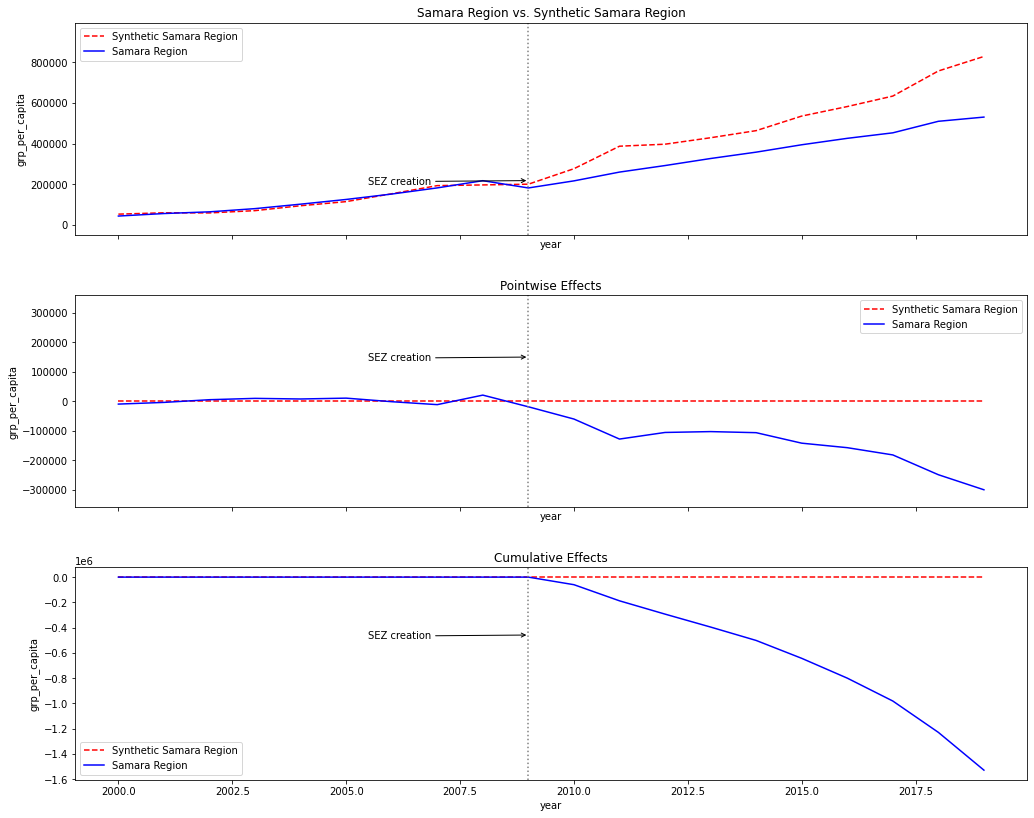

In [ ]:
sc_samara_grp.plot(['original', 'pointwise', 'cumulative'], treated_label='Samara Region', synth_label='Synthetic Samara Region', treatment_label='SEZ creation')

In [ ]:
sc_samara_grp.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Samara Region,11465.933206,167615.782019,14.61859


In [ ]:
sc_samara_grp.original_data.comparison_df

,Samara Region,Synthetic Samara Region,WMAPE,Importance
gross_industry,427531.70,95208.43,332323.27,0.21
gross_export,5742.10,6530.69,2087.17,0.17
price_indexes,114.50,123.84,9.33,0.19
population,3233.29,2435.40,797.89,0.00
investments,75492.73,67105.64,29565.70,0.02
fixed_assets,1040691.60,669274.22,371417.38,0.00
grp_per_capita,119795.23,118759.51,52890.10,0.21
unemployment_rate,5.54,11.76,6.22,0.19


In [ ]:
sc_samara_grp.original_data.weight_df

,Weight
The Republic of Ingushetia,0.074685
Tyumen region without autonomous districts,0.151230
Altai region,0.665560
Zabaykalsky Krai,0.108524


In [ ]:
data_for_samara_test = data_sc.copy(deep=True)

In [ ]:
l___ = sc_samara_grp.original_data.weight_df.index.tolist()

In [ ]:
l___.append('Samara Region')

In [ ]:
data_for_samara_test = data_for_samara_test[data_for_samara_test.region_name.isin(l___)]

In [ ]:
data_for_samara_test.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
data_for_samara_test.reset_index(drop=True, inplace=True)

In [ ]:
sc_test = Synth(dataset=data_for_samara_test, outcome_var='grp_per_capita', id_var='region_name', time_var='year', treatment_period=2010, treated_unit='Samara Region', n_optim=25)

In [ ]:
sc_test.in_space_placebo(n_optim=20)

/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


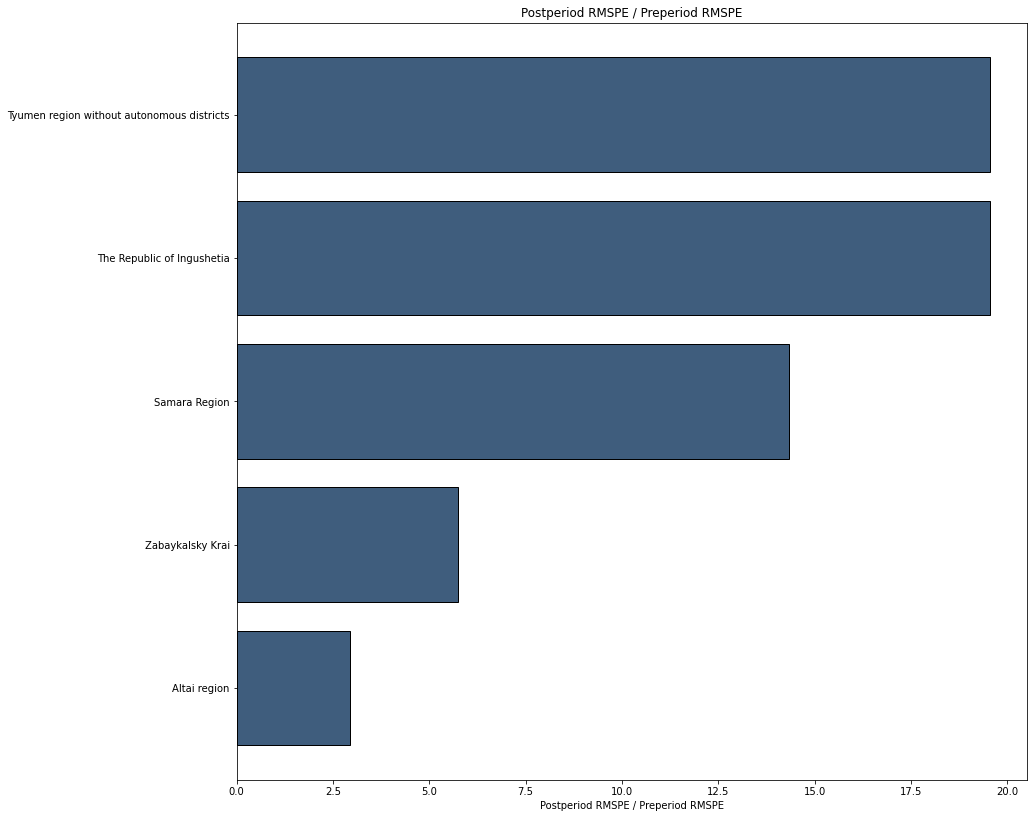

In [ ]:
sc_test.plot(['rmspe ratio'])

In [ ]:
sc_samara_invest = synths_samara_list[1]

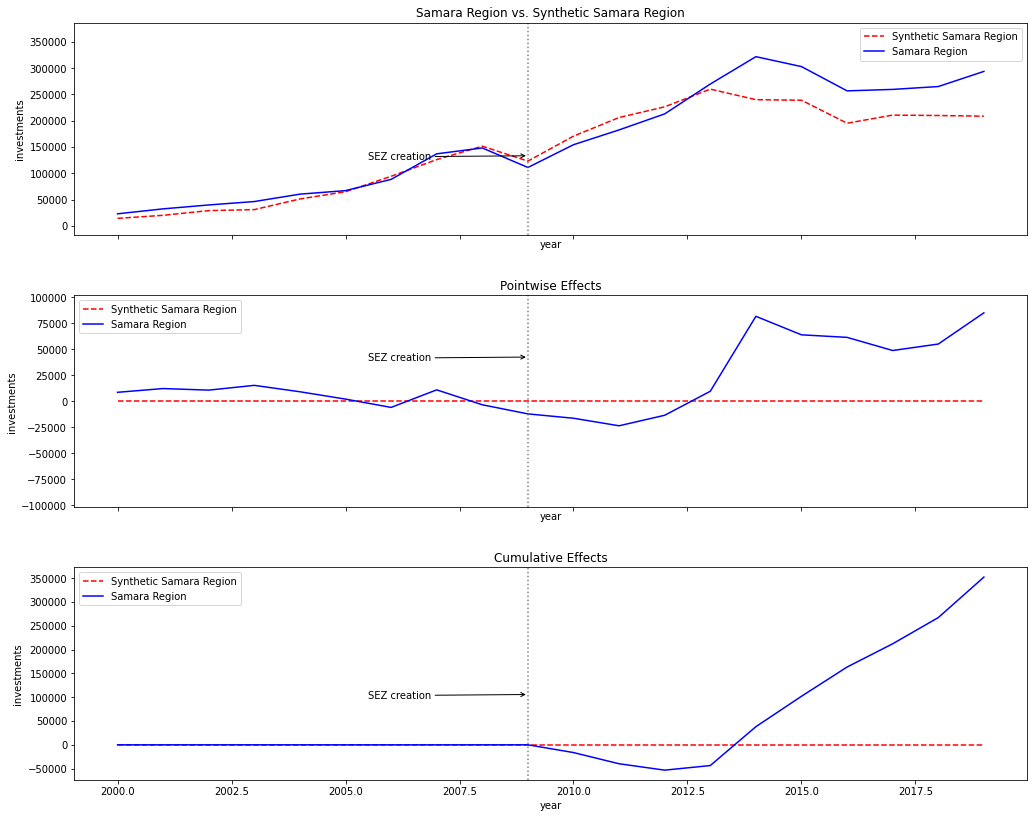

In [ ]:
sc_samara_invest.plot(['original', 'pointwise', 'cumulative'], treated_label='Samara Region', synth_label='Synthetic Samara Region', treatment_label='SEZ creation')

In [ ]:
sc_samara_invest.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Samara Region,9885.851369,53186.885733,5.380102


In [ ]:
sc_samara_invest.original_data.comparison_df

,Samara Region,Synthetic Samara Region,WMAPE,Importance
gross_industry,427531.70,92007.12,336130.58,0.01
gross_export,5742.10,1209.83,4540.41,0.00
price_indexes,114.50,123.44,8.77,0.00
population,3233.29,1127.59,2818.52,0.00
investments,75492.73,70699.42,38135.54,0.86
fixed_assets,1040691.60,327748.23,719079.71,0.10
grp_per_capita,119795.23,727042.58,620794.14,0.02
unemployment_rate,5.54,8.31,2.76,0.01


In [ ]:
sc_samara_invest.original_data.weight_df

,Weight
Nenets Autonomous Okrug,0.525913
Krasnodar region,0.185066
Sakhalin region,0.290439


In [ ]:
data_for_sc_samara_invest = data_sc.copy(deep=True)

In [ ]:
data_for_sc_samara_invest = data_for_sc_samara_invest[(data_for_sc_samara_invest.region_name.isin(sc_samara_invest.original_data.weight_df.index.tolist())) | (data_for_sc_samara_invest.region_name == 'Samara Region')]

In [ ]:
data_for_sc_samara_invest.fillna(0, inplace=True)
data_for_sc_samara_invest.reset_index(drop=True, inplace=True)

In [ ]:
sc_test_2 = Synth(dataset=data_for_sc_samara_invest, outcome_var='investments', id_var='region_name', time_var='year', treatment_period=2010, treated_unit='Samara Region', n_optim=25)

In [ ]:
sc_test_2.original_data.weight_df

,Weight
Nenets Autonomous Okrug,0.525577
Krasnodar region,0.183701
Sakhalin region,0.290722


In [ ]:
sc_test_2.in_space_placebo(n_optim=15)

/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


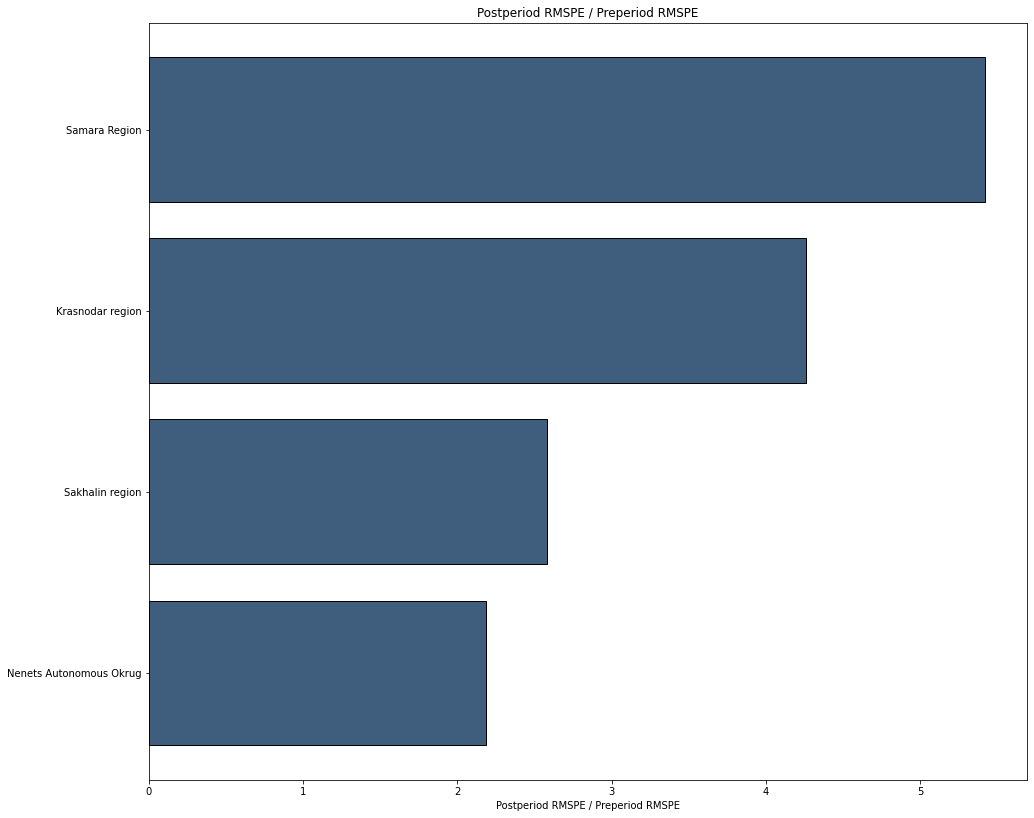

In [ ]:
sc_test_2.plot(['rmspe ratio'])

In [ ]:
sc_samara_industry = synths_samara_list[2]

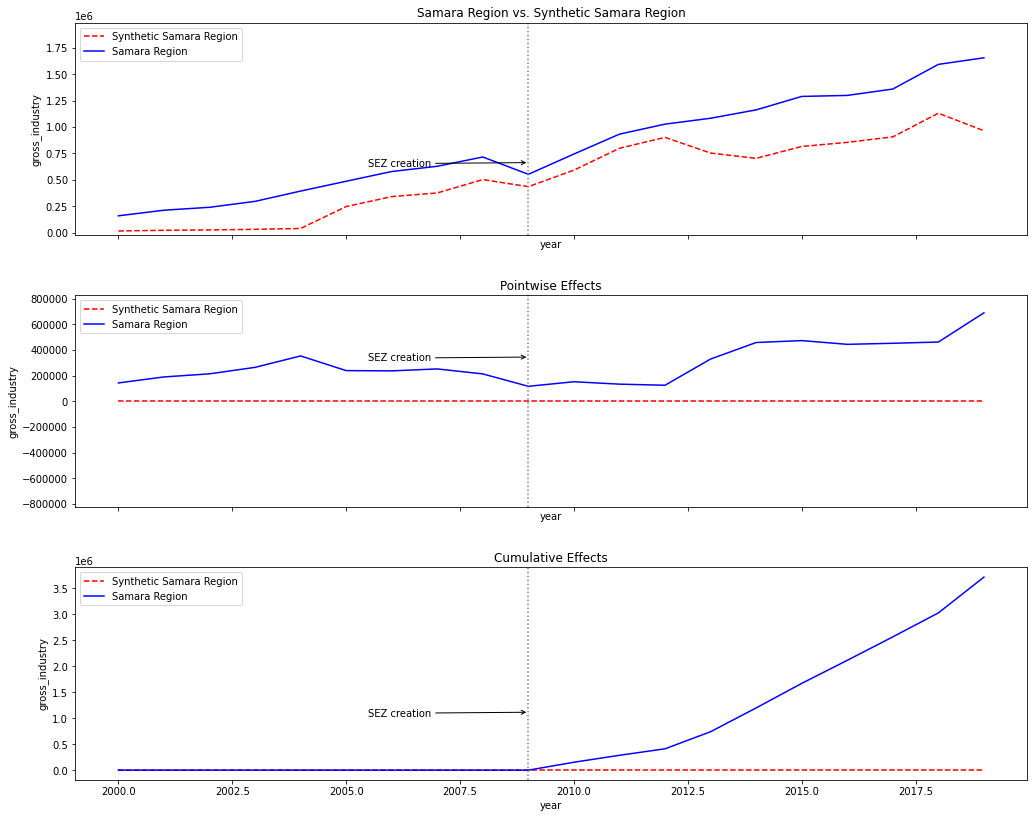

In [ ]:
sc_samara_industry.plot(['original', 'pointwise', 'cumulative'], treated_label='Samara Region', synth_label='Synthetic Samara Region', treatment_label='SEZ creation')

In [ ]:
sc_samara_industry.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Samara Region,230842.568332,410751.373602,1.779357


In [ ]:
sc_samara_industry.original_data.comparison_df

,Samara Region,Synthetic Samara Region,WMAPE,Importance
gross_industry,427531.70,205287.73,222840.91,0.0
gross_export,5742.10,13251.05,7500.93,1.0
price_indexes,114.50,139.61,24.94,0.0
population,3233.29,1325.19,1912.62,0.0
investments,75492.73,0.00,75598.14,0.0
fixed_assets,1040691.60,165518.08,876626.59,0.0
grp_per_capita,119795.23,0.00,119962.49,0.0
unemployment_rate,5.54,7.83,2.28,0.0


In [ ]:
sc_samara_industry.original_data.weight_df

,Weight
Tyumen region without autonomous districts,1.001396


##Sverdlovsk region

In [ ]:
region_ = 'Sverdlovsk region'
list_dependent_variables = ['grp_per_capita', 'investments', 'gross_industry']
prog_start = time.time()

synths_sverdlovsk_list = []
run = 0

listsezreg_without_ = listsezreg_2019[:]
listsezreg_without_.remove(region_)

data_for_synth_ = data_sc.copy(deep=True)
  
for element__ in listsezreg_without_:
  data_for_synth_.drop(index=data_for_synth_[data_for_synth_.region_name == element__].index.tolist(), inplace=True)
  
data_for_synth_.fillna(0, inplace=True)

for dep in list_dependent_variables:
  
    
  try:
    synth_ = Synth(dataset=data_for_synth_, outcome_var=dep, id_var='region_name', time_var='year', treatment_period=int(sez[sez.sez_reg_en == region_].sez_year), treated_unit=region_, n_optim=50)
  except:
    print(f'error occured at run {run}')
    pass
  synths_sverdlovsk_list.append(synth_)

  print(f'run: {run}, region: {region_}, dep: {dep}, n_optim: 50\n\t It took {(time.time() - prog_start) / 60} mins')
  run += 1

run: 0, region: Sverdlovsk region, dep: grp_per_capita, n_optim: 50
	 It took 12.443029129505158 mins
run: 1, region: Sverdlovsk region, dep: investments, n_optim: 50
	 It took 30.7415510058403 mins
run: 2, region: Sverdlovsk region, dep: gross_industry, n_optim: 50
	 It took 40.864400315284726 mins


In [ ]:
synths_sverdlovsk_list

In [ ]:
sc_sverdlovsk_grp = synths_sverdlovsk_list[0]

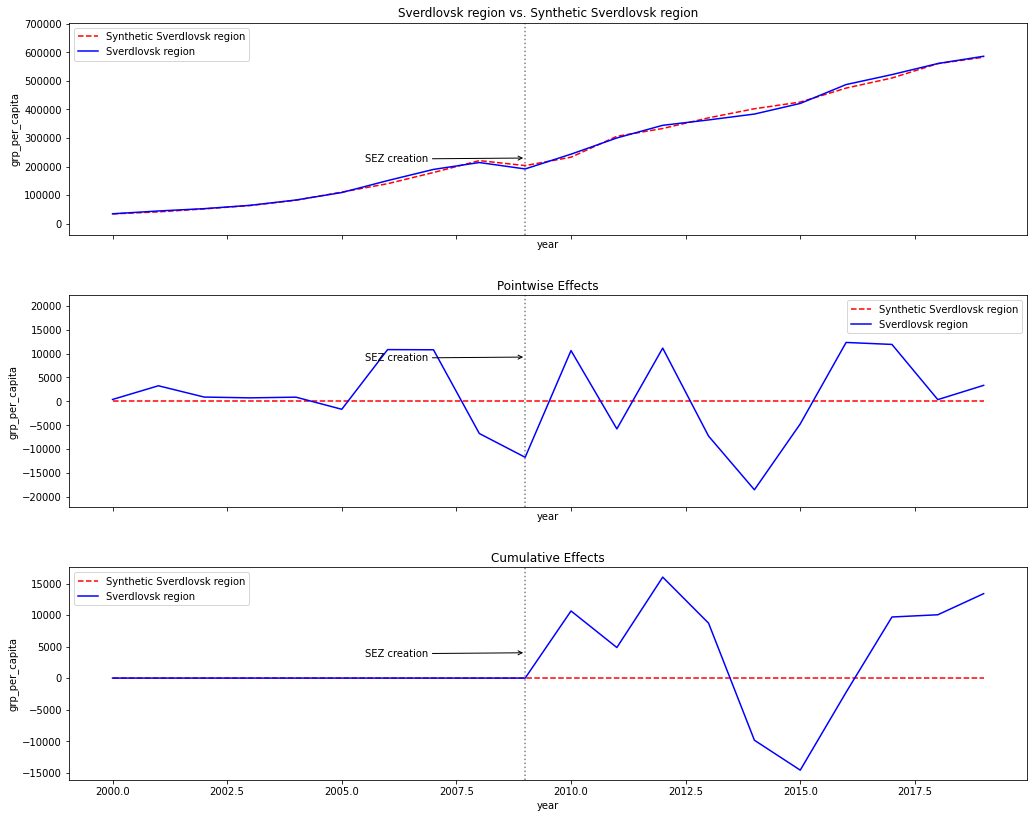

In [ ]:
sc_sverdlovsk_grp.plot(['original', 'pointwise', 'cumulative'], treated_label='Sverdlovsk region', synth_label='Synthetic Sverdlovsk region', treatment_label='SEZ creation')

In [ ]:
sc_sverdlovsk_grp.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Sverdlovsk region,6589.863714,9994.674803,1.516674


In [ ]:
sc_sverdlovsk_grp.original_data.comparison_df

,Sverdlovsk region,Synthetic Sverdlovsk region,WMAPE,Importance
gross_industry,532676.80,332006.97,538893.61,0.49
gross_export,5770.57,17669.55,19854.14,0.00
price_indexes,119.68,122.99,6.99,0.00
population,4399.57,4317.42,3161.57,0.00
investments,108141.22,141976.21,142959.49,0.00
fixed_assets,1351584.20,1709456.49,1883745.81,0.00
grp_per_capita,113133.36,112373.16,115919.27,0.49
unemployment_rate,7.32,17.77,12.94,0.02


In [ ]:
sc_sverdlovsk_grp.original_data.weight_df

,Weight
Moscow city,0.222093
Arkhangelsk region without an autonomous district,0.128609
Krasnodar region,0.160851
The Republic of Dagestan,0.320693
The Republic of Ingushetia,0.167422


In [ ]:
data_for_sc_sverdlovsk_grp = data_sc.copy(deep=True)

In [ ]:
data_for_sc_sverdlovsk_grp = data_for_sc_sverdlovsk_grp[(data_for_sc_sverdlovsk_grp.region_name == 'Moscow city') | 
                                                        (data_for_sc_sverdlovsk_grp.region_name == 'Arkhangelsk region without an autonomous district') | 
                                                        (data_for_sc_sverdlovsk_grp.region_name == 'Krasnodar region') |
                                                        (data_for_sc_sverdlovsk_grp.region_name == 'The Republic of Dagestan') |
                                                        (data_for_sc_sverdlovsk_grp.region_name == 'The Republic of Ingushetia') |
                                                        (data_for_sc_sverdlovsk_grp.region_name == 'Sverdlovsk region')]

In [ ]:
data_for_sc_sverdlovsk_grp.fillna(0, inplace=True)
data_for_sc_sverdlovsk_grp.reset_index(drop=True, inplace=True)

In [ ]:
sc_sverdlovsk_grp_inspace = Synth(dataset=data_for_sc_sverdlovsk_grp, outcome_var='grp_per_capita', 
                                 id_var='region_name', time_var='year', treatment_period=2010, treated_unit='Sverdlovsk region', n_optim=50)

In [ ]:
sc_sverdlovsk_grp_inspace.original_data.weight_df

,Weight
Moscow city,0.263522
Arkhangelsk region without an autonomous district,0.197567
The Republic of Dagestan,0.127103
The Republic of Ingushetia,0.411355


In [ ]:
sc_sverdlovsk_grp_inspace.in_space_placebo(n_optim=20)

/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


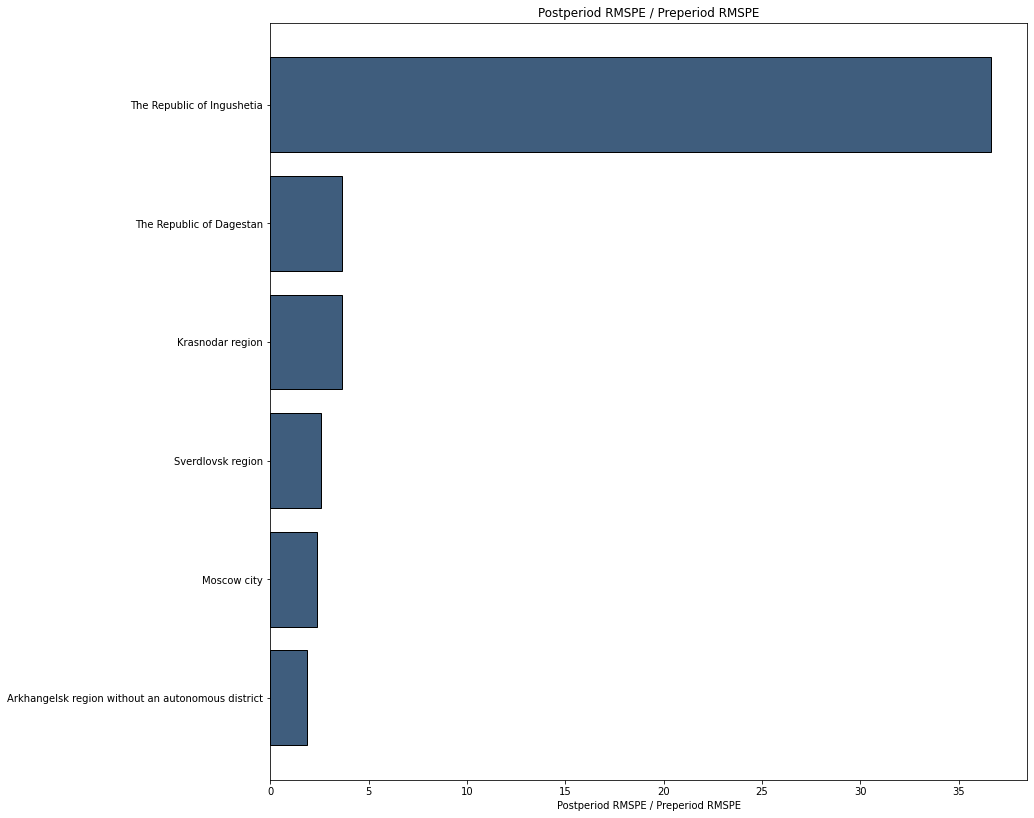

In [ ]:
sc_sverdlovsk_grp_inspace.plot(['rmspe ratio'])

In [ ]:
sc_sverdlovsk_invest = synths_sverdlovsk_list[1]

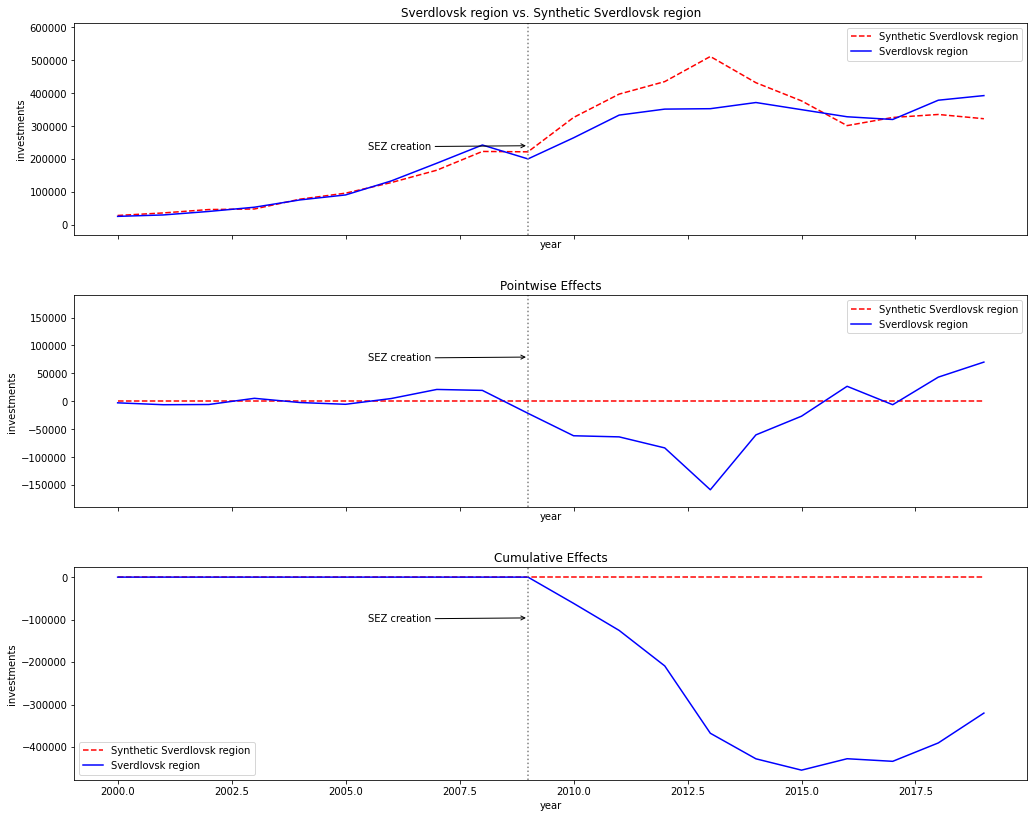

In [ ]:
sc_sverdlovsk_invest.plot(['original', 'pointwise', 'cumulative'], treated_label='Sverdlovsk region', synth_label='Synthetic Sverdlovsk region', treatment_label='SEZ creation')

In [ ]:
sc_sverdlovsk_invest.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Sverdlovsk region,12090.525615,72036.355583,5.958083


In [ ]:
sc_sverdlovsk_invest.original_data.comparison_df

,Sverdlovsk region,Synthetic Sverdlovsk region,WMAPE,Importance
gross_industry,532676.80,134332.56,399008.74,0.31
gross_export,5770.57,1902.20,3875.74,0.03
price_indexes,119.68,121.62,5.70,0.02
population,4399.57,2551.28,2536.74,0.29
investments,108141.22,107400.89,45765.32,0.31
fixed_assets,1351584.20,607042.30,746227.98,0.01
grp_per_capita,113133.36,363678.46,278191.20,0.01
unemployment_rate,7.32,8.39,1.06,0.03


In [ ]:
sc_sverdlovsk_invest.original_data.weight_df

,Weight
Nenets Autonomous Okrug,0.181113
Krasnodar region,0.457031
Sakhalin region,0.363092


In [ ]:
data_for_sc_sverdlovsk_invest = data_sc.copy(deep=True)

In [ ]:
data_for_sc_sverdlovsk_invest = data_for_sc_sverdlovsk_invest[(data_for_sc_sverdlovsk_invest.region_name == 'Nenets Autonomous Okrug') | 
                                                              (data_for_sc_sverdlovsk_invest.region_name == 'Krasnodar region') | 
                                                              (data_for_sc_sverdlovsk_invest.region_name == 'Sakhalin region') | 
                                                              (data_for_sc_sverdlovsk_invest.region_name == 'Sverdlovsk region')]

In [ ]:
data_for_sc_sverdlovsk_invest.fillna(0, inplace=True)
data_for_sc_sverdlovsk_invest.reset_index(drop=True, inplace=True)

In [ ]:
sc_sverdlovsk_invest_inspace = Synth(dataset=data_for_sc_sverdlovsk_grp, outcome_var='investments', 
                                 id_var='region_name', time_var='year', treatment_period=2010, treated_unit='Sverdlovsk region', n_optim=50)

In [ ]:
sc_sverdlovsk_invest_inspace.original_data.weight_df

,Weight
Moscow city,0.184739
Arkhangelsk region without an autonomous district,0.158679
Krasnodar region,0.046693
The Republic of Dagestan,0.447460
The Republic of Ingushetia,0.162429


In [ ]:
sc_sverdlovsk_invest_inspace.in_space_placebo(n_optim=20)

/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


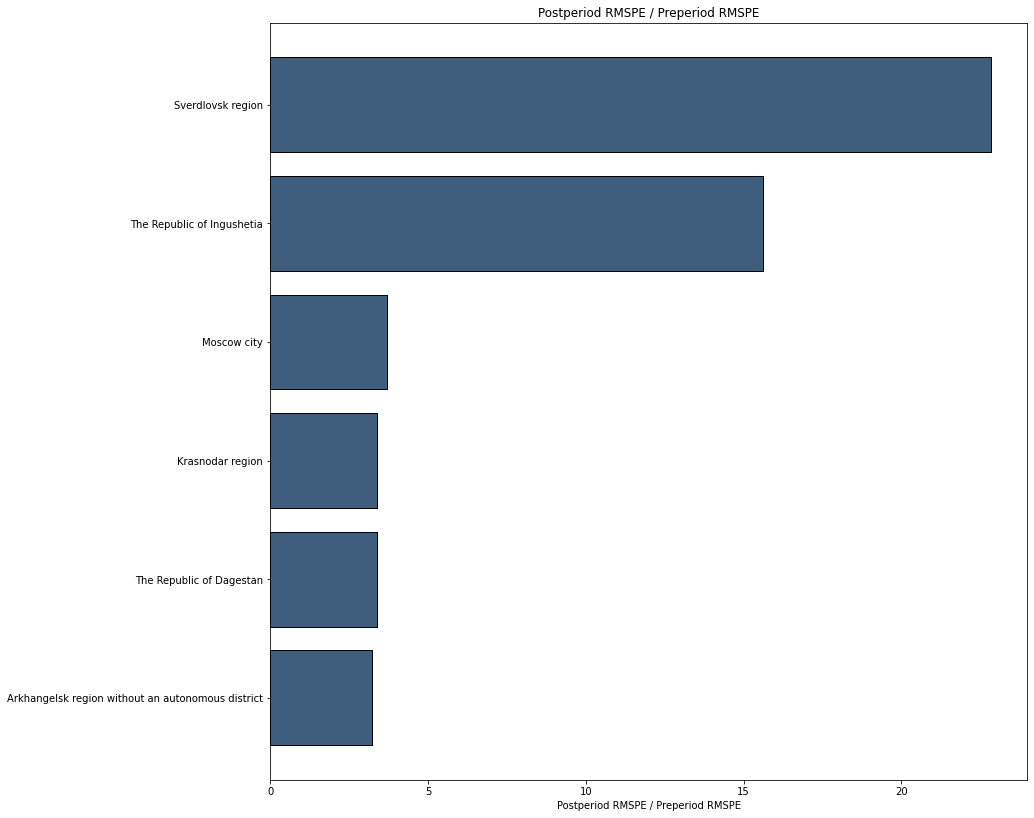

In [ ]:
sc_sverdlovsk_invest_inspace.plot(['rmspe ratio'])

In [ ]:
sc_sverdlovsk_industry = synths_sverdlovsk_list[2]

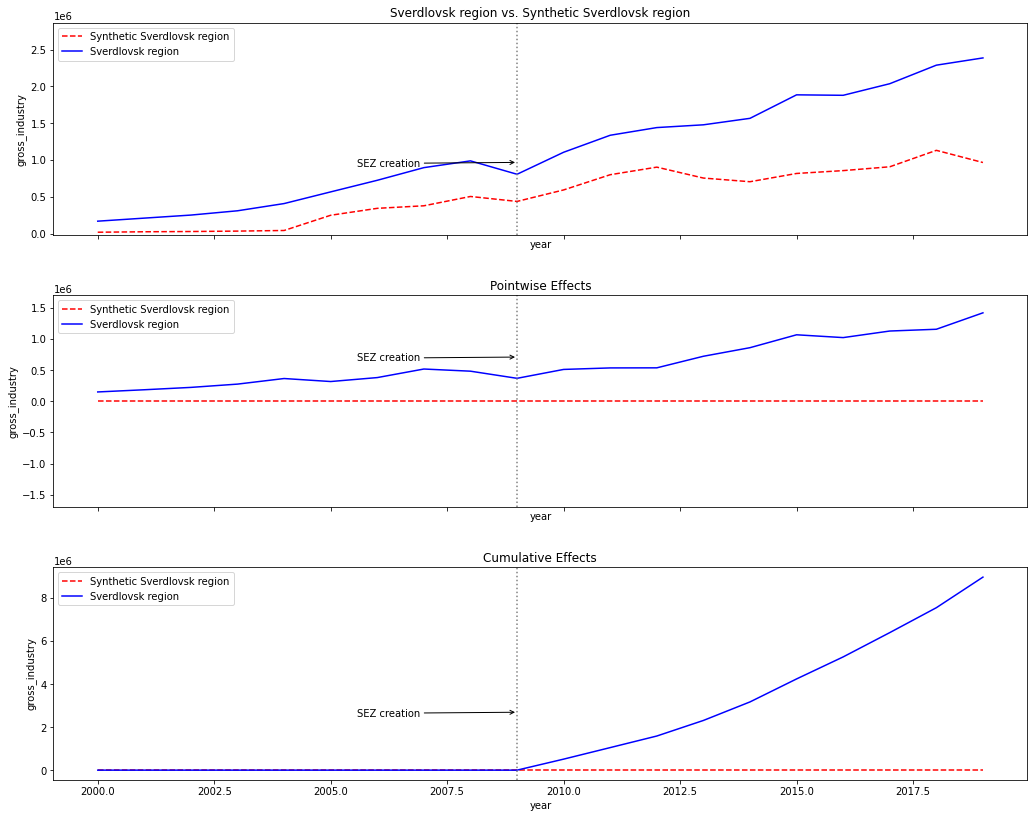

In [ ]:
sc_sverdlovsk_industry.plot(['original', 'pointwise', 'cumulative'], treated_label='Sverdlovsk region', synth_label='Synthetic Sverdlovsk region', treatment_label='SEZ creation')

In [ ]:
sc_sverdlovsk_industry.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Sverdlovsk region,346889.019688,945208.12245,2.724814


In [ ]:
sc_sverdlovsk_industry.original_data.comparison_df

,Sverdlovsk region,Synthetic Sverdlovsk region,WMAPE,Importance
gross_industry,532676.80,205412.24,328331.83,0.0
gross_export,5770.57,13259.08,7476.95,1.0
price_indexes,119.68,139.69,19.77,0.0
population,4399.57,1325.99,3082.39,0.0
investments,108141.22,0.00,108357.89,0.0
fixed_assets,1351584.20,165618.47,1188673.78,0.0
grp_per_capita,113133.36,0.00,113360.04,0.0
unemployment_rate,7.32,7.84,0.50,0.0


In [ ]:
sc_sverdlovsk_industry.original_data.weight_df

,Weight
Tyumen region without autonomous districts,1.002004


##Astrakhan region

In [ ]:
region_ = 'Astrakhan region'
list_dependent_variables = ['grp_per_capita', 'investments', 'gross_industry']
prog_start = time.time()

synths_astrakhan_list = []
run = 0

listsezreg_without_ = listsezreg_2019[:]
listsezreg_without_.remove(region_)

data_for_synth_ = data_sc.copy(deep=True)
  
for element__ in listsezreg_without_:
  data_for_synth_.drop(index=data_for_synth_[data_for_synth_.region_name == element__].index.tolist(), inplace=True)
  
data_for_synth_.fillna(0, inplace=True)

for dep in list_dependent_variables:
  
    
  try:
    synth_ = Synth(dataset=data_for_synth_, outcome_var=dep, id_var='region_name', time_var='year', treatment_period=int(sez[sez.sez_reg_en == region_].sez_year), treated_unit=region_, n_optim=50)
  except:
    print(f'error occured at run {run}')
    pass
  synths_astrakhan_list.append(synth_)

  print(f'run: {run}, region: {region_}, dep: {dep}, n_optim: 50\n\t It took {(time.time() - prog_start) / 60} mins')
  run += 1

run: 0, region: Astrakhan region, dep: grp_per_capita, n_optim: 50
	 It took 14.426524658997854 mins


/usr/local/lib/python3.7/dist-packages/cvxpy/problems/problem.py:1338: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


run: 1, region: Astrakhan region, dep: investments, n_optim: 50
	 It took 25.52109914223353 mins
run: 2, region: Astrakhan region, dep: gross_industry, n_optim: 50
	 It took 41.91452126900355 mins


In [ ]:
synths_astrakhan_list

In [ ]:
sc_astrakhan_grp = synths_astrakhan_list[0]

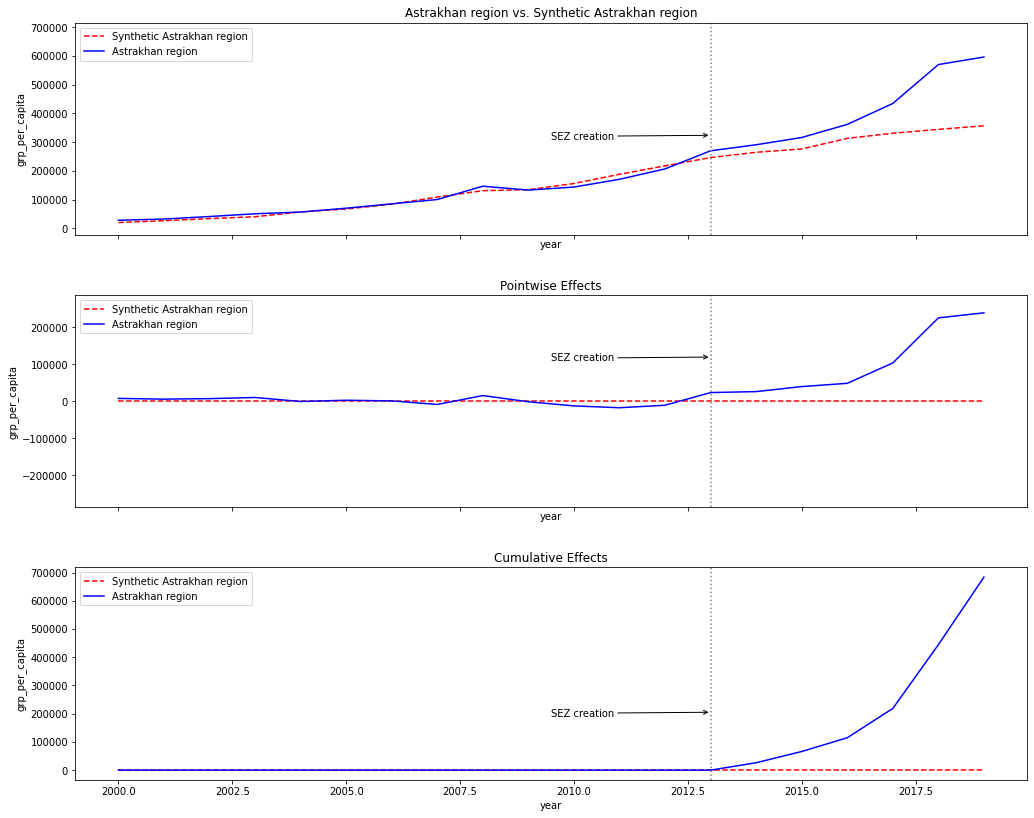

In [ ]:
sc_astrakhan_grp.plot(['original', 'pointwise', 'cumulative'], treated_label='Astrakhan region', synth_label='Synthetic Astrakhan region', treatment_label='SEZ creation')

In [ ]:
sc_astrakhan_grp.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Astrakhan region,11055.811332,143584.68212,12.987259


In [ ]:
sc_astrakhan_grp.original_data.comparison_df

,Astrakhan region,Synthetic Astrakhan region,WMAPE,Importance
gross_industry,62037.57,267130.49,237528.20,0.00
gross_export,482.73,2317.67,2034.18,0.00
price_indexes,114.32,116.65,4.16,0.34
population,1008.44,3109.59,2412.41,0.34
investments,45962.64,173083.25,148947.67,0.04
fixed_assets,419785.29,869412.04,659871.95,0.00
grp_per_capita,109424.88,107753.27,37337.50,0.01
unemployment_rate,9.49,18.82,11.38,0.27


In [ ]:
sc_astrakhan_grp.original_data.weight_df

,Weight
Krasnodar region,0.478473
The Republic of Ingushetia,0.269957
Kemerovo region,0.251570


In [ ]:
data_for_sc_astrakhan_grp = data_sc.copy(deep=True)

In [ ]:
data_for_sc_astrakhan_grp = data_for_sc_astrakhan_grp[ (data_for_sc_astrakhan_grp.region_name == 'Kemerovo region') | 
                                                       (data_for_sc_astrakhan_grp.region_name == 'Krasnodar region') | 
                                                       (data_for_sc_astrakhan_grp.region_name == 'The Republic of Ingushetia') | 
                                                       (data_for_sc_astrakhan_grp.region_name == 'Astrakhan region')]

In [ ]:
data_for_sc_astrakhan_grp.fillna(0, inplace=True)
data_for_sc_astrakhan_grp.reset_index(drop=True, inplace=True)

In [ ]:
sc_astrakhan_grp_inspace = Synth(dataset=data_for_sc_astrakhan_grp, outcome_var='grp_per_capita', 
                                 id_var='region_name', time_var='year', treatment_period=2014, treated_unit='Astrakhan region', n_optim=50)

In [ ]:
sc_astrakhan_grp_inspace.original_data.weight_df

,Weight
Krasnodar region,0.478476
The Republic of Ingushetia,0.269957
Kemerovo region,0.251567


In [ ]:
sc_astrakhan_grp_inspace.in_space_placebo(n_optim=20)

/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


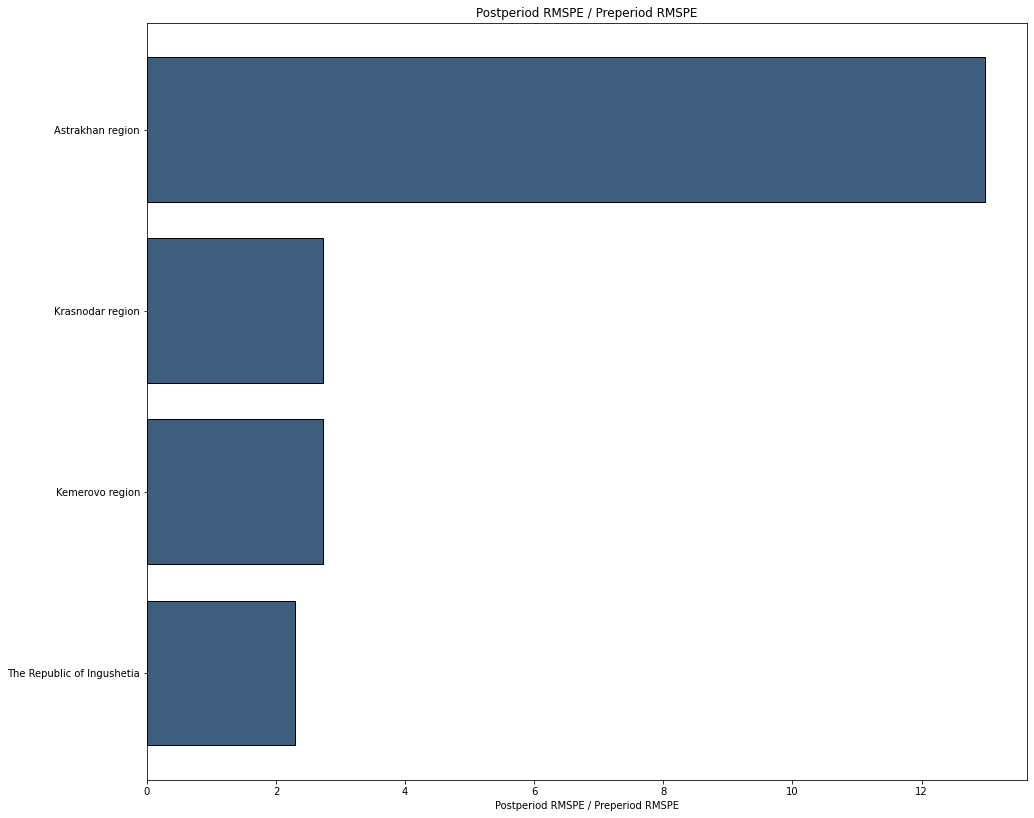

In [ ]:
sc_astrakhan_grp_inspace.plot(['rmspe ratio'])

In [ ]:
sc_astrakhan_invest = synths_astrakhan_list[1]

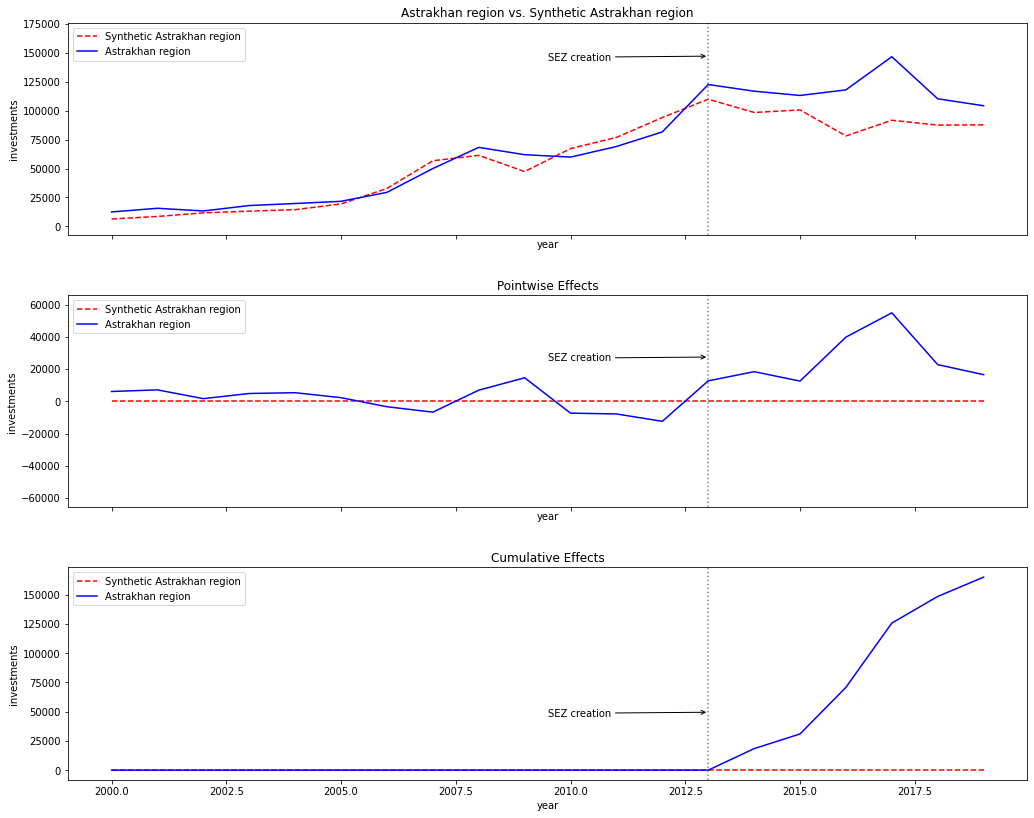

In [ ]:
sc_astrakhan_invest.plot(['original', 'pointwise', 'cumulative'], treated_label='Astrakhan region', synth_label='Synthetic Astrakhan region', treatment_label='SEZ creation')

In [ ]:
sc_astrakhan_invest.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Astrakhan region,7998.414105,31328.357627,3.916821


In [ ]:
sc_astrakhan_invest.original_data.comparison_df

,Astrakhan region,Synthetic Astrakhan region,WMAPE,Importance
gross_industry,62037.57,56219.62,59763.08,0.00
gross_export,482.73,564.08,484.21,0.00
price_indexes,114.32,121.94,7.92,0.25
population,1008.44,667.45,1011.45,0.25
investments,45962.64,44271.71,47275.18,0.24
fixed_assets,419785.29,203117.54,396619.01,0.02
grp_per_capita,109424.88,750654.20,720102.00,0.00
unemployment_rate,9.49,29.69,21.68,0.25


In [ ]:
sc_astrakhan_invest.original_data.weight_df

,Weight
Nenets Autonomous Okrug,0.374081
Krasnodar region,0.080091
The Republic of Ingushetia,0.545828


In [ ]:
data_for_astrakhan_invest = data_sc.copy(deep=True)

In [ ]:
data_for_astrakhan_invest = data_for_astrakhan_invest[(data_for_astrakhan_invest.region_name == 'Nenets Autonomous Okrug') | 
                                                         (data_for_astrakhan_invest.region_name == 'Krasnodar region') | 
                                                         (data_for_astrakhan_invest.region_name == 'The Republic of Ingushetia') | 
                                                         (data_for_astrakhan_invest.region_name == 'Astrakhan region')]

In [ ]:
data_for_astrakhan_invest.fillna(0, inplace=True)
data_for_astrakhan_invest.reset_index(drop=True, inplace=True)

In [ ]:
sc_astrakhan_invest_inspace = Synth(dataset=data_for_astrakhan_invest, outcome_var='investments', 
                                    id_var='region_name', time_var='year', treatment_period=2014, treated_unit='Astrakhan region', n_optim=50)

In [ ]:
sc_astrakhan_invest_inspace.original_data.weight_df

,Weight
Nenets Autonomous Okrug,0.848663
Krasnodar region,0.045180
The Republic of Ingushetia,0.106158


In [ ]:
sc_astrakhan_invest_inspace.in_space_placebo(n_optim=20)

/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


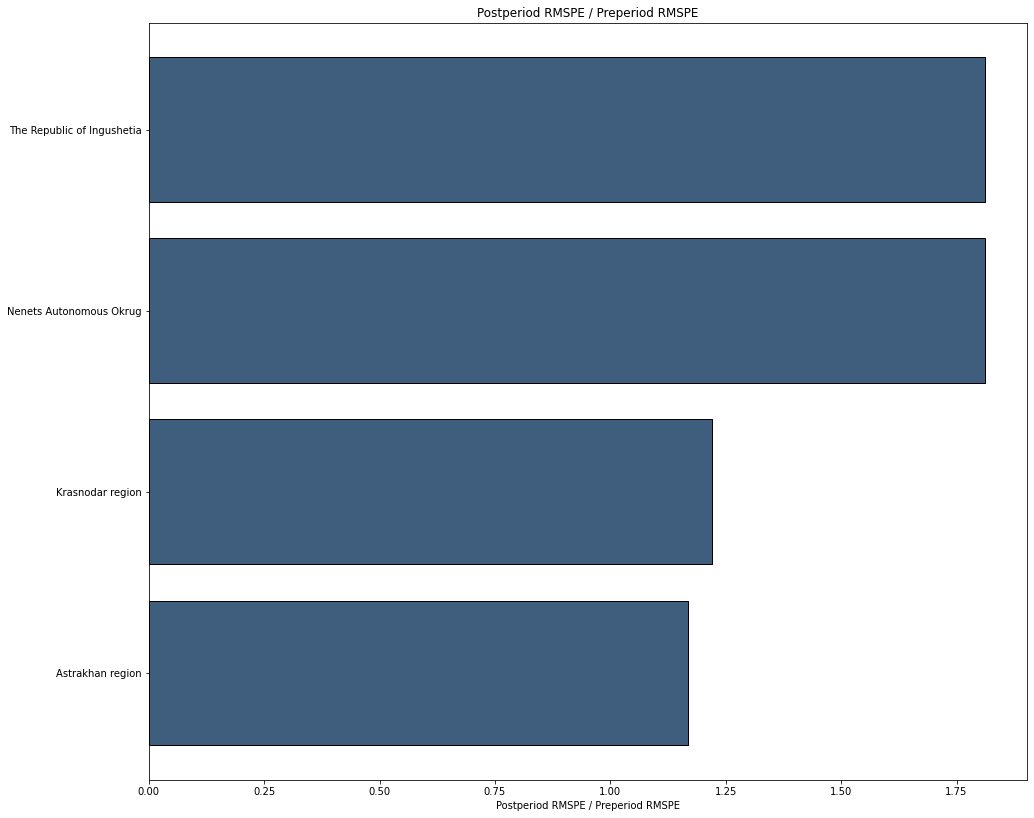

In [ ]:
sc_astrakhan_invest_inspace.plot(['rmspe ratio'])

In [ ]:
sc_astrakhan_industry = synths_astrakhan_list[2]

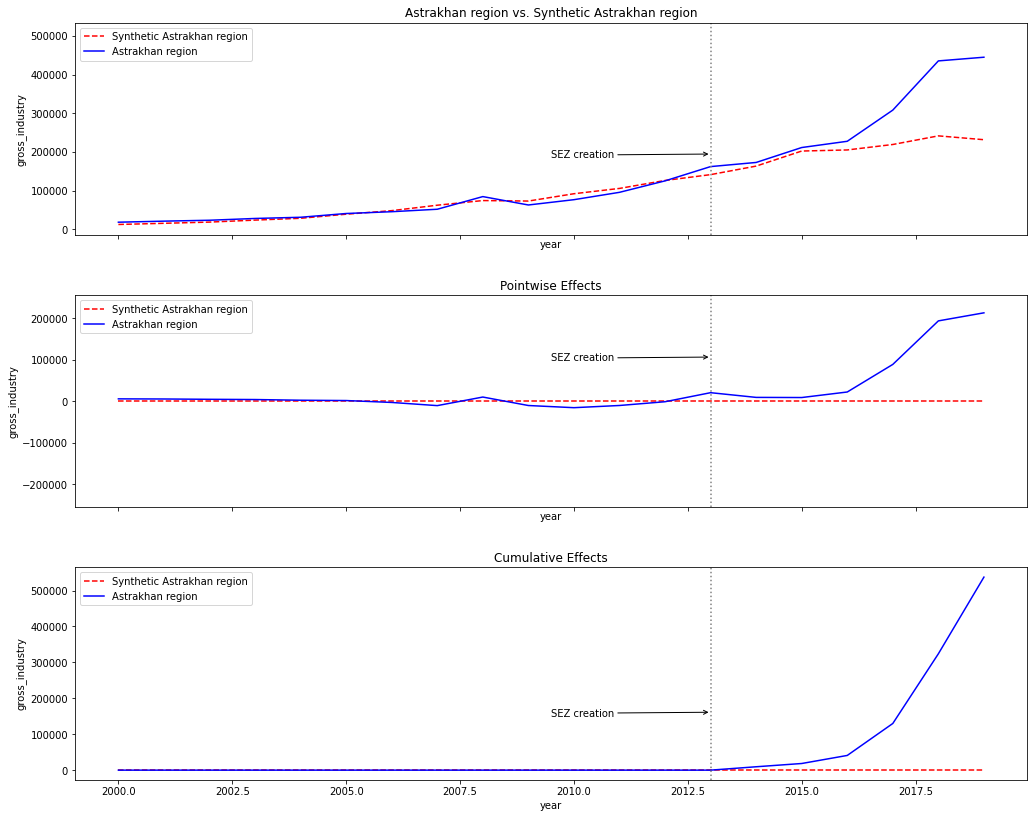

In [ ]:
sc_astrakhan_industry.plot(['original', 'pointwise', 'cumulative'], treated_label='Astrakhan region', synth_label='Synthetic Astrakhan region', treatment_label='SEZ creation')

In [ ]:
sc_astrakhan_industry.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Astrakhan region,9315.068444,123675.60243,13.27694


In [ ]:
sc_astrakhan_industry.original_data.comparison_df

,Astrakhan region,Synthetic Astrakhan region,WMAPE,Importance
gross_industry,62037.57,61600.76,91758.96,0.01
gross_export,482.73,802.20,921.91,0.20
price_indexes,114.32,123.30,9.73,0.20
population,1008.44,1366.30,1295.00,0.20
investments,45962.64,69644.29,88695.70,0.20
fixed_assets,419785.29,329097.82,534315.40,0.00
grp_per_capita,109424.88,57107.07,61172.33,0.00
unemployment_rate,9.49,38.62,29.85,0.20


In [ ]:
sc_astrakhan_industry.original_data.weight_df

,Weight
Krasnodar region,0.197447
The Republic of Ingushetia,0.755625
The Republic of Buryatia,0.046928


In [ ]:
data_for_astrakhan_industry = data_sc.copy(deep=True)

In [ ]:
data_for_astrakhan_industry = data_for_astrakhan_industry[(data_for_astrakhan_industry.region_name == 'The Republic of Buryatia') | 
                                                          (data_for_astrakhan_industry.region_name == 'Krasnodar region') | 
                                                          (data_for_astrakhan_industry.region_name == 'The Republic of Ingushetia') | 
                                                          (data_for_astrakhan_industry.region_name == 'Astrakhan region')]

In [ ]:
data_for_astrakhan_industry.fillna(0, inplace=True)
data_for_astrakhan_industry.reset_index(drop=True, inplace=True)

In [ ]:
sc_astrakhan_industry_inspace = Synth(dataset=data_for_astrakhan_industry, outcome_var='gross_industry', 
                                    id_var='region_name', time_var='year', treatment_period=2014, treated_unit='Astrakhan region', n_optim=50)

In [ ]:
sc_astrakhan_industry_inspace.original_data.weight_df

,Weight
Krasnodar region,0.172377
The Republic of Ingushetia,0.607656
The Republic of Buryatia,0.219967


In [ ]:
sc_astrakhan_industry_inspace.in_space_placebo(n_optim=20)

/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


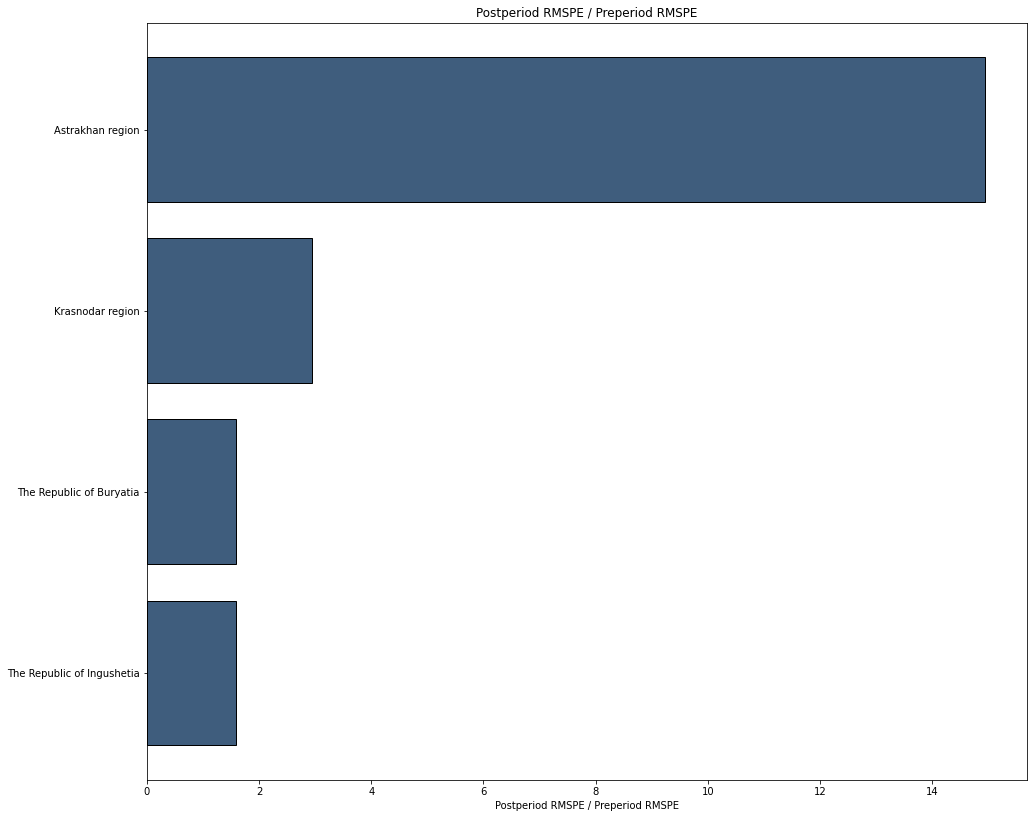

In [ ]:
sc_astrakhan_industry_inspace.plot(['rmspe ratio'])

##Tula region

In [ ]:
region_ = 'Tula region'
list_dependent_variables = ['grp_per_capita', 'investments', 'gross_industry']
prog_start = time.time()

synths_tula_list = []
run = 0

listsezreg_without_ = listsezreg_2019[:]
listsezreg_without_.remove(region_)

data_for_synth_ = data_sc.copy(deep=True)
  
for element__ in listsezreg_without_:
  data_for_synth_.drop(index=data_for_synth_[data_for_synth_.region_name == element__].index.tolist(), inplace=True)
  
data_for_synth_.fillna(0, inplace=True)

for dep in list_dependent_variables:
  
    
  try:
    synth_ = Synth(dataset=data_for_synth_, outcome_var=dep, id_var='region_name', time_var='year', treatment_period=int(sez[sez.sez_reg_en == region_].sez_year), treated_unit=region_, n_optim=50)
  except:
    print(f'error occured at run {run}')
    pass
  synths_tula_list.append(synth_)

  print(f'run: {run}, region: {region_}, dep: {dep}, n_optim: 50\n\t It took {(time.time() - prog_start) / 60} mins')
  run += 1

run: 0, region: Tula region, dep: grp_per_capita, n_optim: 50
	 It took 16.353356051445008 mins
run: 1, region: Tula region, dep: investments, n_optim: 50
	 It took 30.60229975382487 mins


/usr/local/lib/python3.7/dist-packages/cvxpy/problems/problem.py:1338: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


run: 2, region: Tula region, dep: gross_industry, n_optim: 50
	 It took 48.91451994975408 mins


In [ ]:
synths_tula_list

In [ ]:
sc_tula_grp = synths_tula_list[0]

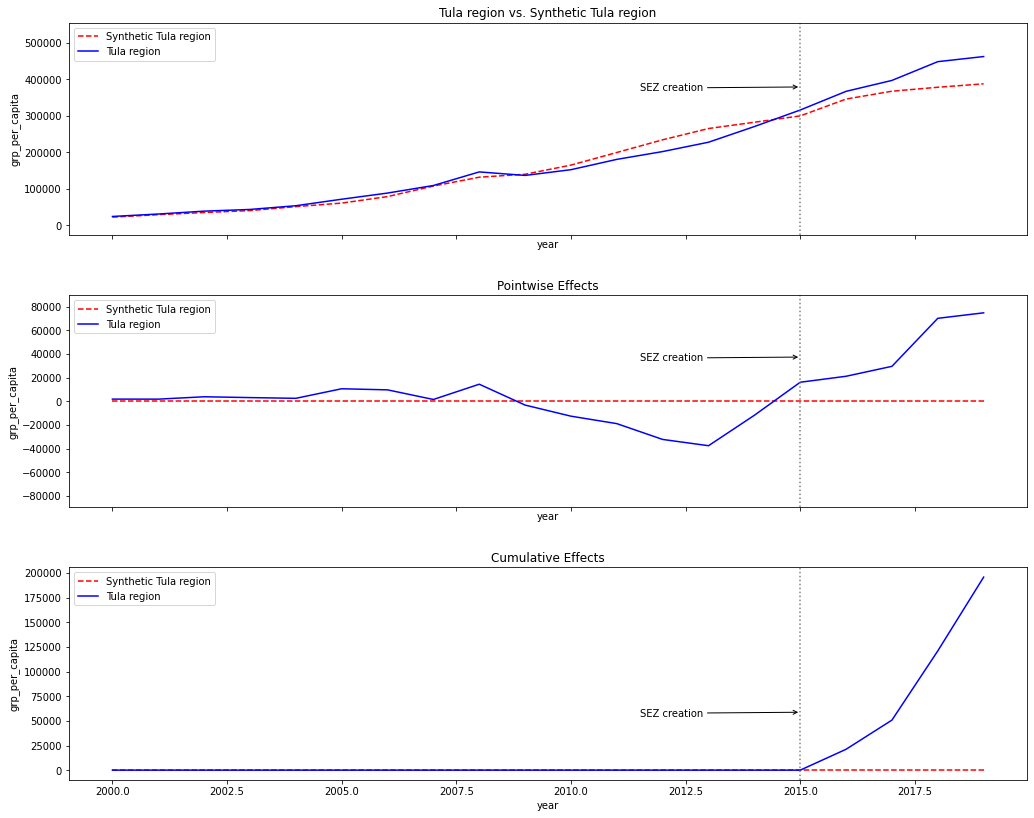

In [ ]:
sc_tula_grp.plot(['original', 'pointwise', 'cumulative'], treated_label='Tula region', synth_label='Synthetic Tula region', treatment_label='SEZ creation')

In [ ]:
sc_tula_grp.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Tula region,15477.600207,54437.654574,3.51719


In [ ]:
sc_tula_grp.original_data.comparison_df

,Tula region,Synthetic Tula region,WMAPE,Importance
gross_industry,242321.88,288291.25,148427.22,0.00
gross_export,2432.66,3326.28,1890.37,0.09
price_indexes,112.50,114.53,2.97,0.31
population,1592.35,4206.26,3107.70,0.22
investments,48671.60,294677.24,263769.17,0.11
fixed_assets,470706.75,1511049.99,1225766.30,0.00
grp_per_capita,130929.22,134100.47,39330.36,0.04
unemployment_rate,4.96,15.61,10.65,0.23


In [ ]:
sc_tula_grp.original_data.weight_df

,Weight
Krasnodar region,0.786396
The Republic of Ingushetia,0.213604


In [ ]:
data_for_tula_grp = data_sc.copy(deep=True)

In [ ]:
data_for_tula_grp = data_for_tula_grp[(data_for_tula_grp.region_name == 'Krasnodar region') |
                                      (data_for_tula_grp.region_name == 'The Republic of Ingushetia') |
                                      (data_for_tula_grp.region_name == 'Tula region')]

In [ ]:
data_for_tula_grp.fillna(0, inplace=True)
data_for_tula_grp.reset_index(drop=True, inplace=True)

In [ ]:
sc_tula_grp_inspace = Synth(dataset=data_for_tula_grp, outcome_var='grp_per_capita', 
                            id_var='region_name', time_var='year', treatment_period=2016, treated_unit='Tula region', n_optim=50)

In [ ]:
sc_tula_grp_inspace.original_data.weight_df

,Weight
Krasnodar region,0.735275
The Republic of Ingushetia,0.264725


In [ ]:
sc_tula_grp_inspace.in_space_placebo(n_optim=20)

/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


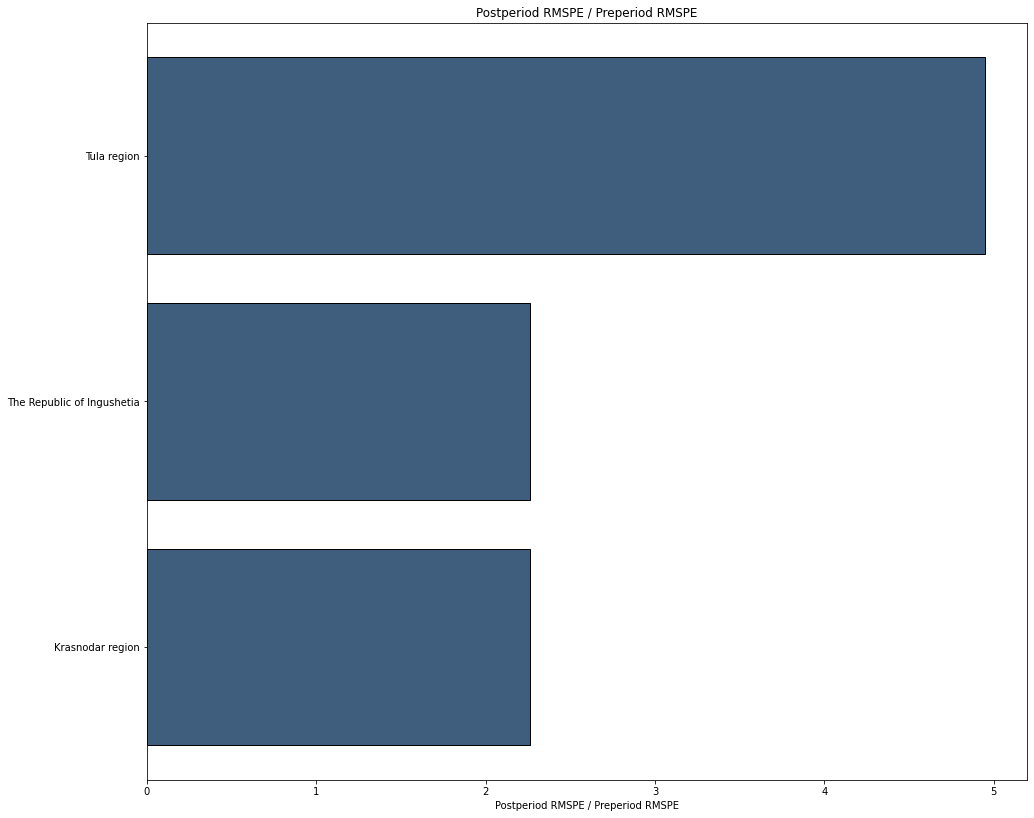

In [ ]:
sc_tula_grp_inspace.plot(['rmspe ratio'])

In [ ]:
sc_tula_invest = synths_tula_list[1]

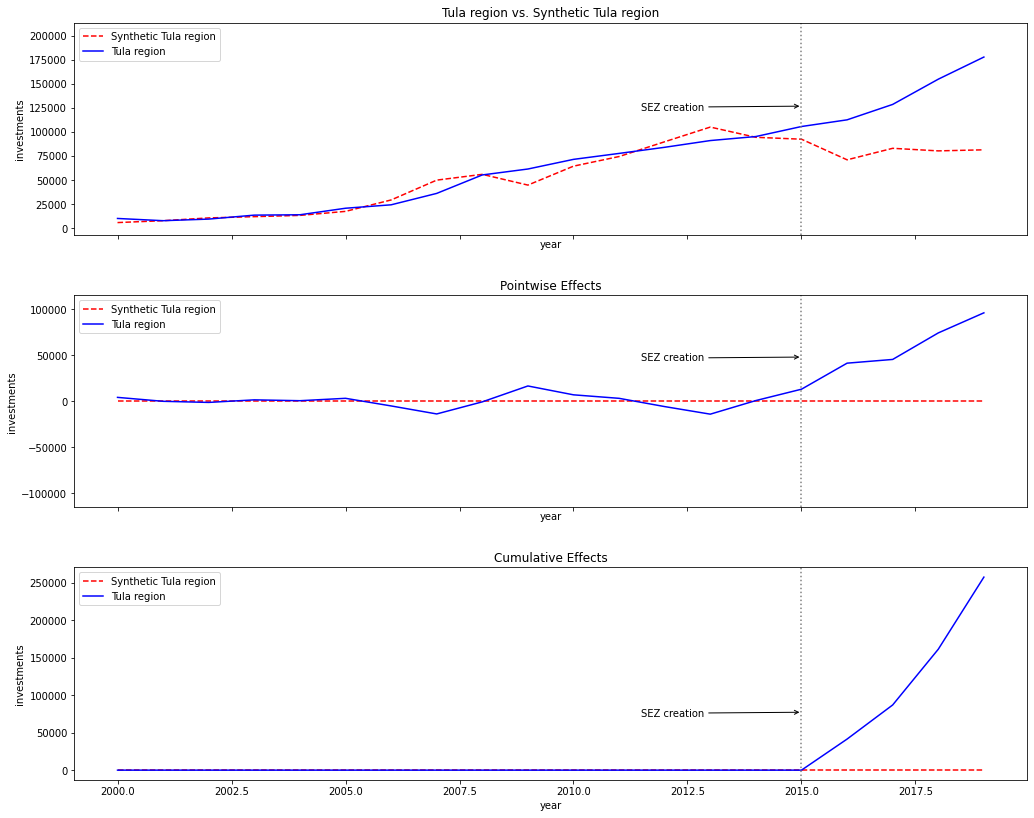

In [ ]:
sc_tula_invest.plot(['original', 'pointwise', 'cumulative'], treated_label='Tula region', synth_label='Synthetic Tula region', treatment_label='SEZ creation')

In [ ]:
sc_tula_invest.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Tula region,7866.456516,68202.272624,8.670012


In [ ]:
sc_tula_invest.original_data.comparison_df

,Tula region,Synthetic Tula region,WMAPE,Importance
gross_industry,242321.88,77133.71,184753.74,0.32
gross_export,2432.66,522.39,2190.47,0.08
price_indexes,112.50,119.67,7.26,0.05
population,1592.35,656.31,1511.90,0.20
investments,48671.60,48027.61,51951.65,0.31
fixed_assets,470706.75,240016.00,458769.47,0.04
grp_per_capita,130929.22,763251.27,719585.59,0.00
unemployment_rate,4.96,23.62,18.67,0.00


In [ ]:
sc_tula_invest.original_data.weight_df

,Weight
Nenets Autonomous Okrug,0.313557
Krasnodar region,0.079149
The Republic of Ingushetia,0.329098
The Republic of Buryatia,0.278196


In [ ]:
data_for_tula_invest = data_sc.copy(deep=True)

In [ ]:
data_for_tula_invest = data_for_tula_invest[(data_for_tula_invest.region_name == 'Krasnodar region') |
                                             (data_for_tula_invest.region_name == 'The Republic of Ingushetia') |
                                             (data_for_tula_invest.region_name == 'The Republic of Buryatia') |
                                             (data_for_tula_invest.region_name == 'Nenets Autonomous Okrug') |
                                             (data_for_tula_invest.region_name == 'Tula region')]

In [ ]:
data_for_tula_invest.fillna(0, inplace=True)
data_for_tula_invest.reset_index(drop=True, inplace=True)

In [ ]:
sc_tula_invest_inspace = Synth(dataset=data_for_tula_invest, outcome_var='investments', 
                            id_var='region_name', time_var='year', treatment_period=2016, treated_unit='Tula region', n_optim=50)

In [ ]:
sc_tula_invest_inspace.original_data.weight_df

,Weight
Nenets Autonomous Okrug,0.324674
Krasnodar region,0.079125
The Republic of Buryatia,0.596201


In [ ]:
sc_tula_invest_inspace.in_space_placebo(n_optim=20)

/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


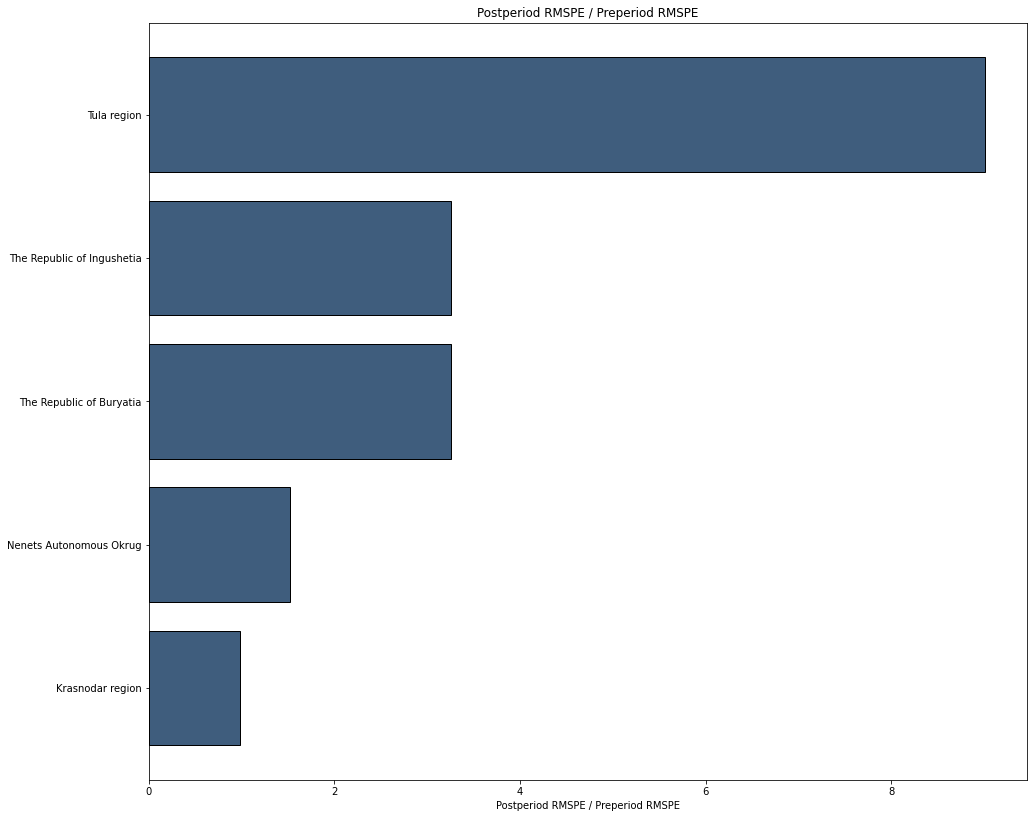

In [ ]:
sc_tula_invest_inspace.plot(['rmspe ratio'])

In [ ]:
sc_tula_industry = synths_tula_list[2]

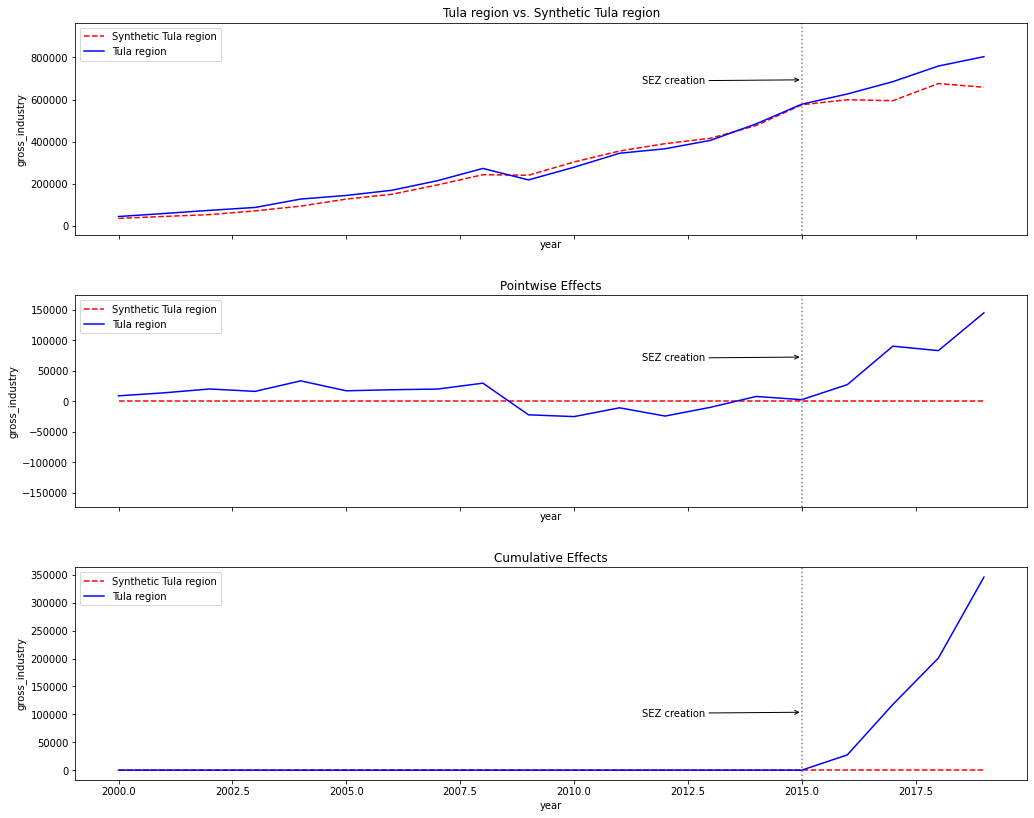

In [ ]:
sc_tula_industry.plot(['original', 'pointwise', 'cumulative'], treated_label='Tula region', synth_label='Synthetic Tula region', treatment_label='SEZ creation')

In [ ]:
sc_tula_industry.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Tula region,19363.309457,95999.372415,4.957798


In [ ]:
sc_tula_industry.original_data.comparison_df

,Tula region,Synthetic Tula region,WMAPE,Importance
gross_industry,242321.88,236225.96,172379.84,1.0
gross_export,2432.66,1980.15,1805.32,0.0
price_indexes,112.50,116.38,4.33,0.0
population,1592.35,2256.84,2200.56,0.0
investments,48671.60,161917.66,136003.47,0.0
fixed_assets,470706.75,853841.30,732793.62,0.0
grp_per_capita,130929.22,748068.76,625580.29,0.0
unemployment_rate,4.96,8.08,3.18,0.0


In [ ]:
sc_tula_industry.original_data.weight_df

,Weight
Nenets Autonomous Okrug,0.244358
Krasnodar region,0.381068
The Republic of Buryatia,0.074227
Kemerovo region,0.109151
Chukotsk Autonomous Okrug,0.190543


In [ ]:
data_for_tula_industry = data_sc.copy(deep=True)

In [ ]:
data_for_tula_industry = data_for_tula_industry[(data_for_tula_industry.region_name == 'Krasnodar region') |
                                                (data_for_tula_industry.region_name == 'Nenets Autonomous Okrug') |
                                                (data_for_tula_industry.region_name == 'The Republic of Buryatia') |
                                                (data_for_tula_industry.region_name == 'Kemerovo region') |
                                                (data_for_tula_industry.region_name == 'Chukotsk Autonomous Okrug') |
                                                (data_for_tula_industry.region_name == 'Tula region')]

In [ ]:
data_for_tula_industry.fillna(0, inplace=True)
data_for_tula_industry.reset_index(drop=True, inplace=True)

In [ ]:
sc_tula_industry_inspace = Synth(dataset=data_for_tula_industry, outcome_var='gross_industry', 
                                 id_var='region_name', time_var='year', treatment_period=2016, treated_unit='Tula region', n_optim=50)

In [ ]:
sc_tula_industry_inspace.original_data.weight_df

,Weight
Krasnodar region,0.373275
The Republic of Buryatia,0.023262
Kemerovo region,0.151144
Chukotsk Autonomous Okrug,0.452318


In [ ]:
sc_tula_industry_inspace.in_space_placebo(n_optim=20)

/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


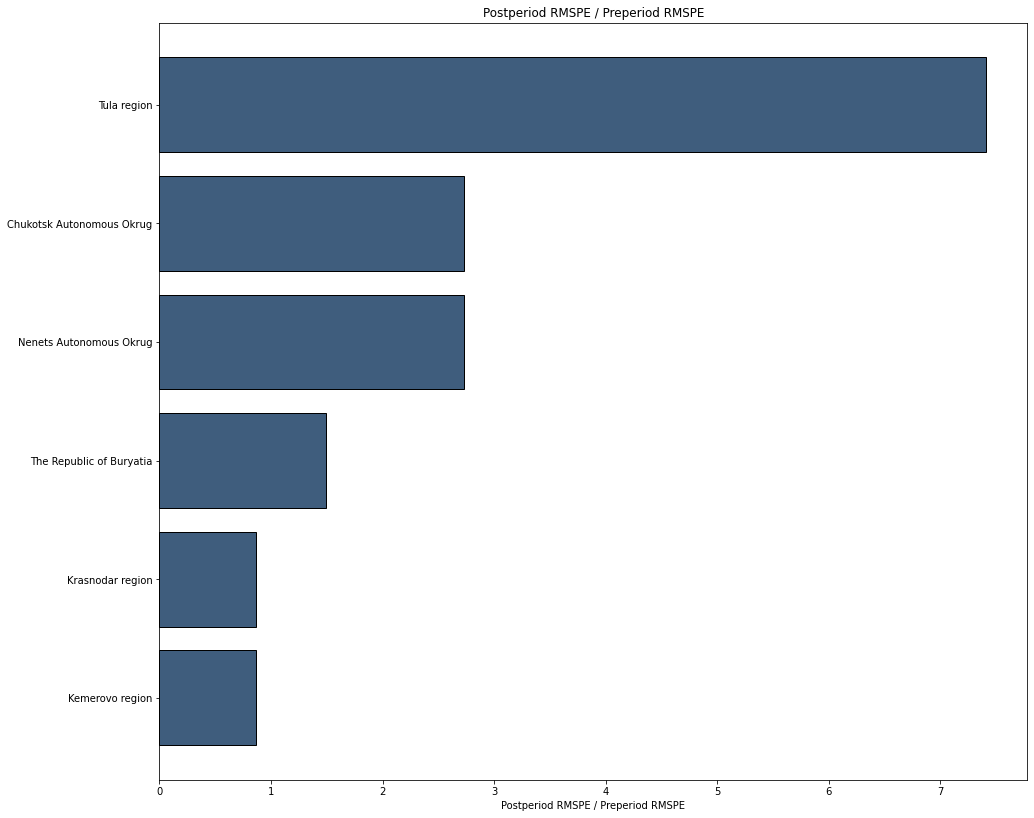

In [ ]:
sc_tula_industry_inspace.plot(['rmspe ratio'])

##Tatarstan

In [ ]:
region_ = 'Republic of Tatarstan'
list_dependent_variables = ['grp_per_capita', 'investments', 'gross_industry']
prog_start = time.time()

synths_tatarstan_list = []
run = 0

listsezreg_without_ = listsezreg_2019[:]
listsezreg_without_.remove(region_)

data_for_synth_ = data_sc.copy(deep=True)
  
for element__ in listsezreg_without_:
  data_for_synth_.drop(index=data_for_synth_[data_for_synth_.region_name == element__].index.tolist(), inplace=True)
  
data_for_synth_.fillna(0, inplace=True)

for dep in list_dependent_variables:
  
    
  try:
    synth_ = Synth(dataset=data_for_synth_, outcome_var=dep, id_var='region_name', time_var='year', treatment_period=int(sez[sez.sez_reg_en == region_].sez_year), treated_unit=region_, n_optim=50)
  except:
    print(f'error occured at run {run}')
    pass
  synths_tatarstan_list.append(synth_)

  print(f'run: {run}, region: {region_}, dep: {dep}, n_optim: 50\n\t It took {(time.time() - prog_start) / 60} mins')
  run += 1

/usr/local/lib/python3.7/dist-packages/cvxpy/problems/problem.py:1338: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


run: 0, region: Republic of Tatarstan, dep: grp_per_capita, n_optim: 50
	 It took 24.84143991470337 mins
run: 1, region: Republic of Tatarstan, dep: investments, n_optim: 50
	 It took 39.98992348512014 mins
run: 2, region: Republic of Tatarstan, dep: gross_industry, n_optim: 50
	 It took 51.73909039497376 mins


In [ ]:
synths_tatarstan_list

In [ ]:
sc_tatarstan_grp = synths_tatarstan_list[0]

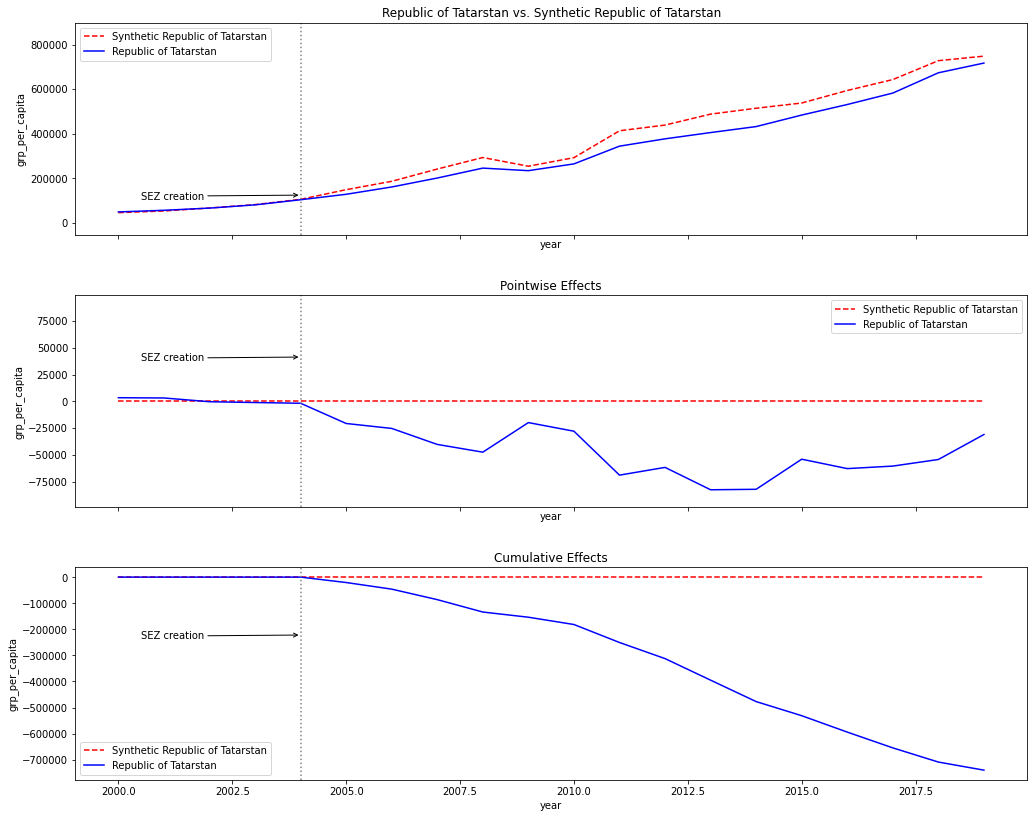

In [ ]:
sc_tatarstan_grp.plot(['original', 'pointwise', 'cumulative'], treated_label='Republic of Tatarstan', synth_label='Synthetic Republic of Tatarstan', treatment_label='SEZ creation')

In [ ]:
sc_tatarstan_grp.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Republic of Tatarstan,2267.537353,53386.427598,23.543792


In [ ]:
sc_tatarstan_grp.original_data.comparison_df

,Republic of Tatarstan,Synthetic Republic of Tatarstan,WMAPE,Importance
gross_industry,258812.60,146566.91,207330.12,0.15
gross_export,3589.84,11965.33,12275.52,0.35
price_indexes,116.80,128.36,12.40,0.22
population,3777.54,4212.66,4427.46,0.06
investments,65532.81,86964.81,103399.73,0.11
fixed_assets,706666.60,940310.43,1117745.35,0.00
grp_per_capita,71290.64,70674.20,80175.15,0.01
unemployment_rate,6.80,22.91,19.58,0.10


In [ ]:
sc_tatarstan_grp.original_data.weight_df

,Weight
Moscow city,0.366762
The Republic of Ingushetia,0.507526
Tyumen region without autonomous districts,0.125712


In [ ]:
sc_tatarstan_invest = synths_tatarstan_list[1]

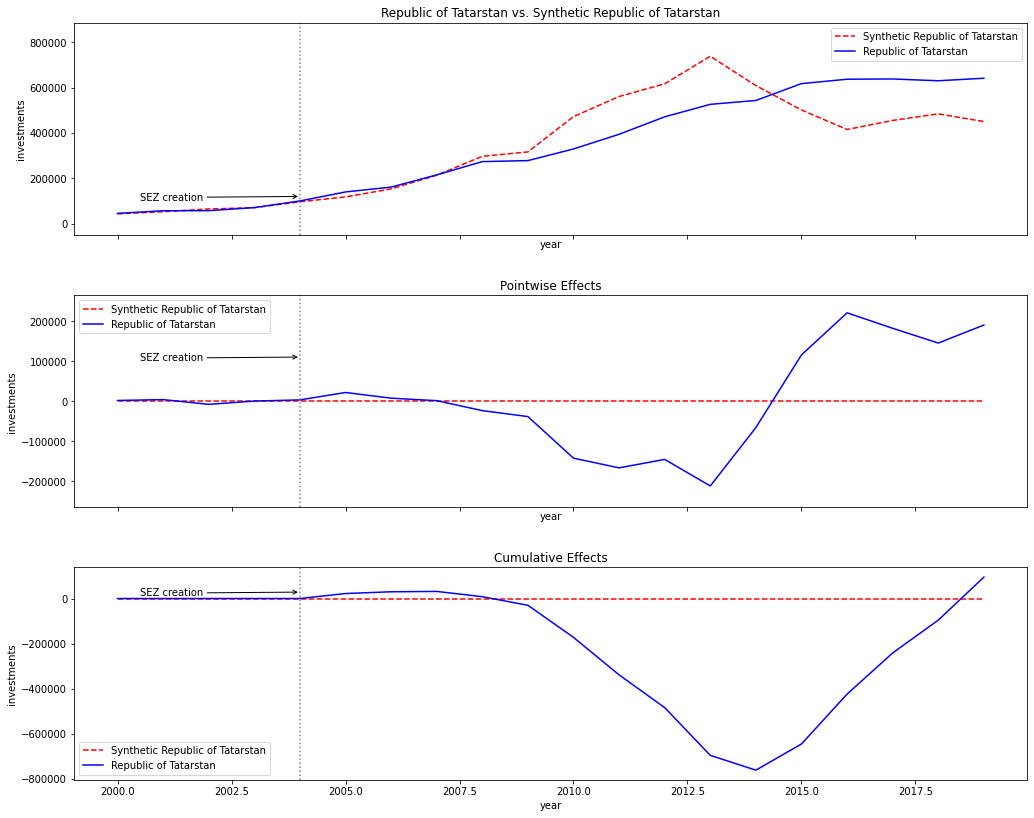

In [ ]:
sc_tatarstan_invest.plot(['original', 'pointwise', 'cumulative'], treated_label='Republic of Tatarstan', synth_label='Synthetic Republic of Tatarstan', treatment_label='SEZ creation')

In [ ]:
sc_tatarstan_invest.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Republic of Tatarstan,4317.002723,135429.601479,31.371211


In [ ]:
sc_tatarstan_invest.original_data.comparison_df

,Republic of Tatarstan,Synthetic Republic of Tatarstan,WMAPE,Importance
gross_industry,258812.60,92960.23,165852.37,0.03
gross_export,3589.84,1002.42,2587.42,0.00
price_indexes,116.80,120.10,3.31,0.05
population,3777.54,4069.88,1721.69,0.15
investments,65532.81,64983.85,13910.43,0.26
fixed_assets,706666.60,569701.15,140960.00,0.00
grp_per_capita,71290.64,59285.89,27041.89,0.48
unemployment_rate,6.80,9.54,3.25,0.04


In [ ]:
sc_tatarstan_invest.original_data.weight_df

,Weight
St. Petersburg,0.093824
Krasnodar region,0.685102
Sakhalin region,0.221074


In [ ]:
sc_tatarstan_inustry = synths_tatarstan_list[2]

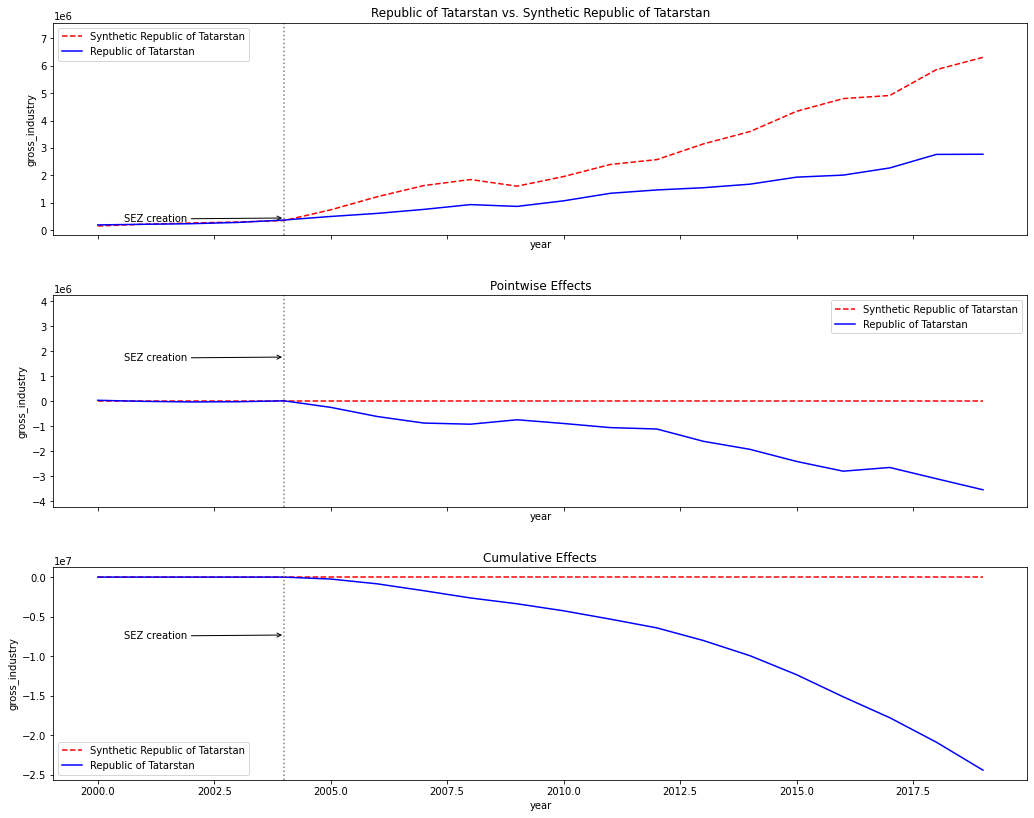

In [ ]:
sc_tatarstan_inustry.plot(['original', 'pointwise', 'cumulative'], treated_label='Republic of Tatarstan', synth_label='Synthetic Republic of Tatarstan', treatment_label='SEZ creation')

In [ ]:
sc_tatarstan_inustry.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Republic of Tatarstan,24057.819188,1.907324e+06,79.280851


In [ ]:
sc_tatarstan_inustry.original_data.comparison_df

,Republic of Tatarstan,Synthetic Republic of Tatarstan,WMAPE,Importance
gross_industry,258812.60,255967.88,158416.43,0.00
gross_export,3589.84,19327.16,18050.69,0.25
price_indexes,116.80,119.68,4.26,0.00
population,3777.54,7184.65,4973.29,0.01
investments,65532.81,160981.22,111291.83,0.46
fixed_assets,706666.60,1671417.83,1246314.61,0.00
grp_per_capita,71290.64,139854.79,77551.55,0.28
unemployment_rate,6.80,5.31,4.20,0.00


In [ ]:
sc_tatarstan_inustry.original_data.weight_df

,Weight
Moscow city,0.600074
Krasnodar region,0.157691
Sakhalin region,0.242235


##Pskov region

In [ ]:
region_ = 'Pskov region'
list_dependent_variables = ['grp_per_capita', 'investments', 'gross_industry']
prog_start = time.time()

synths_pskov_list = []
run = 0

listsezreg_without_ = listsezreg_2019[:]
listsezreg_without_.remove(region_)

data_for_synth_ = data_sc.copy(deep=True)
  
for element__ in listsezreg_without_:
  data_for_synth_.drop(index=data_for_synth_[data_for_synth_.region_name == element__].index.tolist(), inplace=True)
  
data_for_synth_.fillna(0, inplace=True)

for dep in list_dependent_variables:
  
    
  try:
    synth_ = Synth(dataset=data_for_synth_, outcome_var=dep, id_var='region_name', time_var='year', treatment_period=int(sez[sez.sez_reg_en == region_].sez_year), treated_unit=region_, n_optim=50)
  except:
    print(f'error occured at run {run}')
    pass
  synths_pskov_list.append(synth_)

  print(f'run: {run}, region: {region_}, dep: {dep}, n_optim: 50\n\t It took {(time.time() - prog_start) / 60} mins')
  run += 1

run: 0, region: Pskov region, dep: grp_per_capita, n_optim: 50
	 It took 23.77624138991038 mins
run: 1, region: Pskov region, dep: investments, n_optim: 50
	 It took 30.66567045847575 mins
run: 2, region: Pskov region, dep: gross_industry, n_optim: 50
	 It took 48.65296403169632 mins


In [ ]:
synths_pskov_list

In [ ]:
sc_pskov_grp = synths_pskov_list[0]

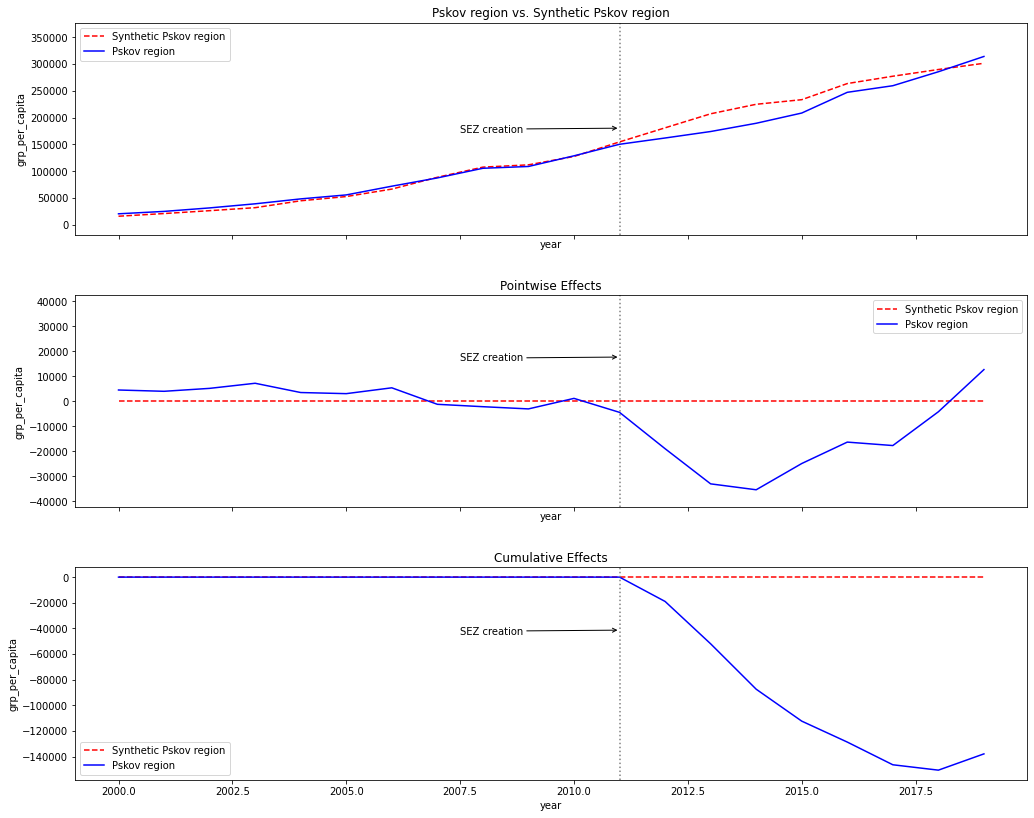

In [ ]:
sc_pskov_grp.plot(['original', 'pointwise', 'cumulative'], treated_label='Pskov region', synth_label='Synthetic Pskov region', treatment_label='SEZ creation')

In [ ]:
sc_pskov_grp.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Pskov region,4108.649896,22598.091503,5.500126


In [ ]:
sc_pskov_grp.original_data.comparison_df

,Pskov region,Synthetic Pskov region,WMAPE,Importance
gross_industry,32839.19,150376.44,144359.59,0.32
gross_export,192.21,1371.23,1248.07,0.00
price_indexes,116.45,119.99,5.81,0.31
population,719.16,2590.80,2085.27,0.31
investments,9790.45,96137.54,90887.74,0.03
fixed_assets,165673.42,556951.15,494359.52,0.00
grp_per_capita,72755.27,70819.71,37491.21,0.01
unemployment_rate,8.18,24.73,16.68,0.01


In [ ]:
sc_pskov_grp.original_data.weight_df

,Weight
Krasnodar region,0.336970
The Republic of Dagestan,0.137610
The Republic of Ingushetia,0.368639
Kemerovo region,0.156788


In [ ]:
data_for_pskov_grp = data_sc.copy(deep=True)

In [ ]:
data_for_pskov_grp = data_for_pskov_grp[(data_for_pskov_grp.region_name == 'Krasnodar region') |
                                        (data_for_pskov_grp.region_name == 'The Republic of Dagestan') |
                                        (data_for_pskov_grp.region_name == 'The Republic of Ingushetia') |
                                        (data_for_pskov_grp.region_name == 'Kemerovo region') |
                                        (data_for_pskov_grp.region_name == 'Pskov region')]

In [ ]:
data_for_pskov_grp.fillna(0, inplace=True)
data_for_pskov_grp.reset_index(drop=True, inplace=True)

In [ ]:
sc_pskov_grp_inspace = Synth(dataset=data_for_pskov_grp, outcome_var='grp_per_capita', 
                                 id_var='region_name', time_var='year', treatment_period=2012, treated_unit='Pskov region', n_optim=50)

In [ ]:
sc_pskov_grp_inspace.original_data.weight_df

,Weight
Krasnodar region,0.255044
The Republic of Dagestan,0.071955
The Republic of Ingushetia,0.421909
Kemerovo region,0.251093


In [ ]:
sc_pskov_grp_inspace.in_space_placebo(n_optim=20)

/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


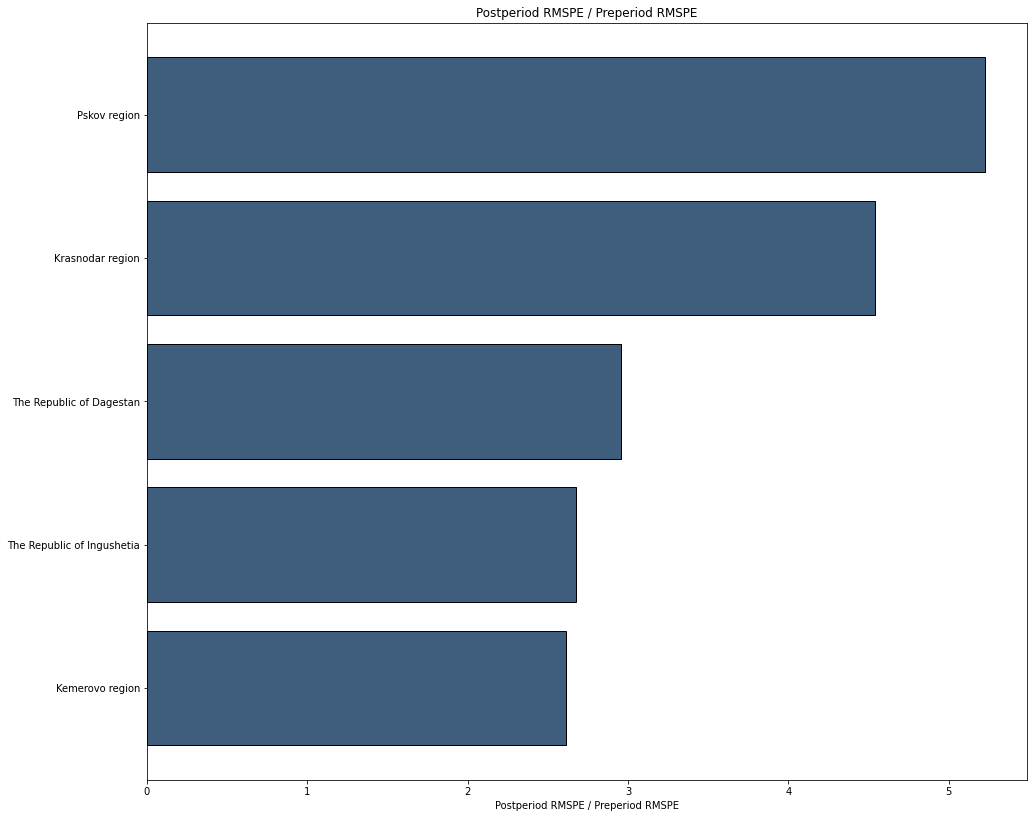

In [ ]:
sc_pskov_grp_inspace.plot(['rmspe ratio'])

In [ ]:
sc_pskov_invest = synths_pskov_list[1]

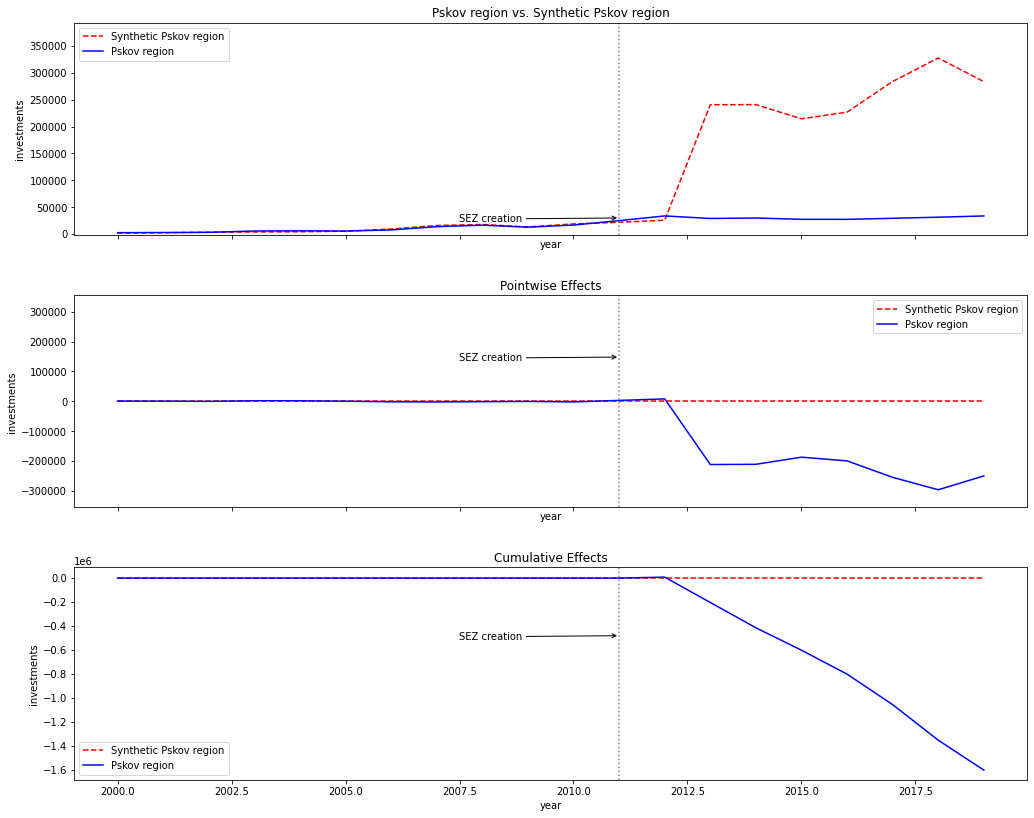

In [ ]:
sc_pskov_invest.plot(['original', 'pointwise', 'cumulative'], treated_label='Pskov region', synth_label='Synthetic Pskov region', treatment_label='SEZ creation')

In [ ]:
sc_pskov_invest.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Pskov region,1580.026007,217744.953923,137.810994


In [ ]:
sc_pskov_invest.original_data.comparison_df

,Pskov region,Synthetic Pskov region,WMAPE,Importance
gross_industry,32839.19,260632.23,227793.04,0.00
gross_export,192.21,14251.70,14059.49,0.22
price_indexes,116.45,134.73,18.42,0.03
population,719.16,1272.64,707.59,0.11
investments,9790.45,9767.08,16866.85,0.05
fixed_assets,165673.42,322300.91,165642.38,0.01
grp_per_capita,72755.27,222178.05,199883.87,0.53
unemployment_rate,8.18,7.69,0.50,0.05


In [ ]:
sc_pskov_invest.original_data.weight_df

,Weight
Nenets Autonomous Okrug,0.113753
Krasnodar region,0.023660
Tyumen region without autonomous districts,0.862587


In [ ]:
data_for_pskov_invest = data_sc.copy(deep=True)

In [ ]:
data_for_pskov_invest = data_for_pskov_invest[(data_for_pskov_invest.region_name == 'Krasnodar region') |
                                              (data_for_pskov_invest.region_name == 'Nenets Autonomous Okrug') |
                                              (data_for_pskov_invest.region_name == 'Tyumen region without autonomous districts') |
                                              (data_for_pskov_invest.region_name == 'Pskov region')]

In [ ]:
data_for_pskov_invest.fillna(0, inplace=True)
data_for_pskov_invest.reset_index(drop=True, inplace=True)

In [ ]:
sc_pskov_invest_inspace = Synth(dataset=data_for_pskov_invest, outcome_var='investments', 
                                id_var='region_name', time_var='year', treatment_period=2012, treated_unit='Pskov region', n_optim=50)

In [ ]:
sc_pskov_invest_inspace.original_data.weight_df

,Weight
Nenets Autonomous Okrug,0.084264
Krasnodar region,0.026909
Tyumen region without autonomous districts,0.888827


In [ ]:
sc_pskov_invest_inspace.in_space_placebo(n_optim=20)

/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


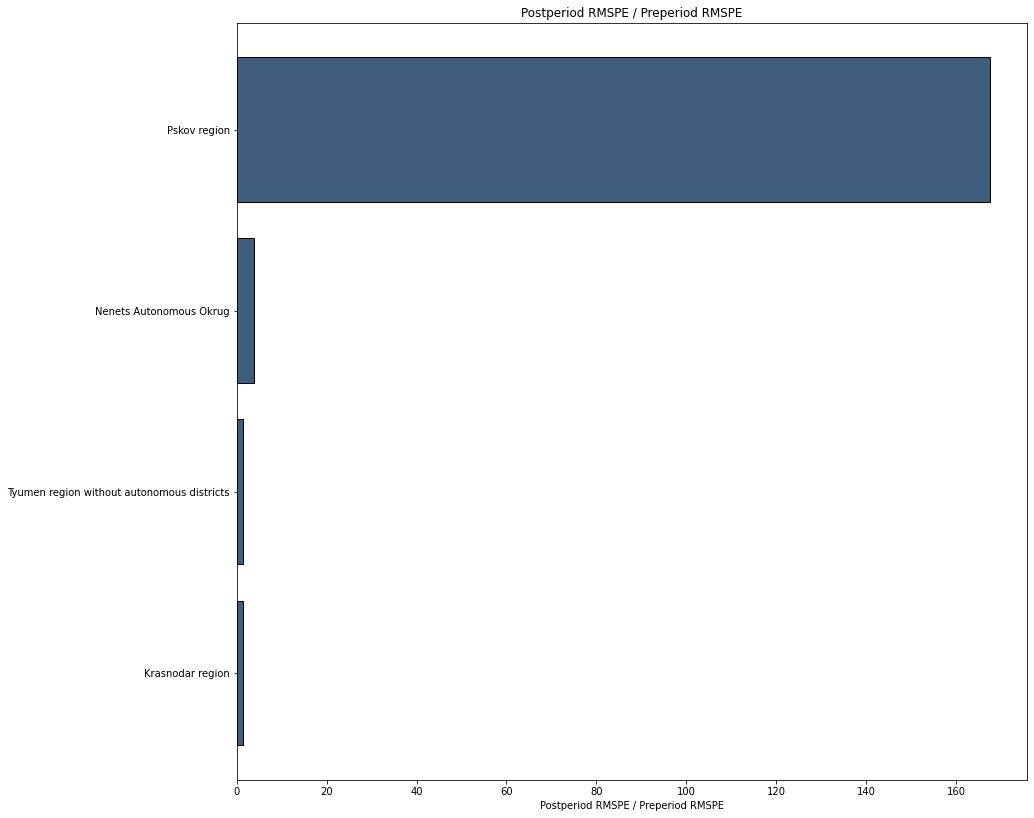

In [ ]:
sc_pskov_invest_inspace.plot(['rmspe ratio'])

In [ ]:
sc_pskov_industry = synths_pskov_list[2]

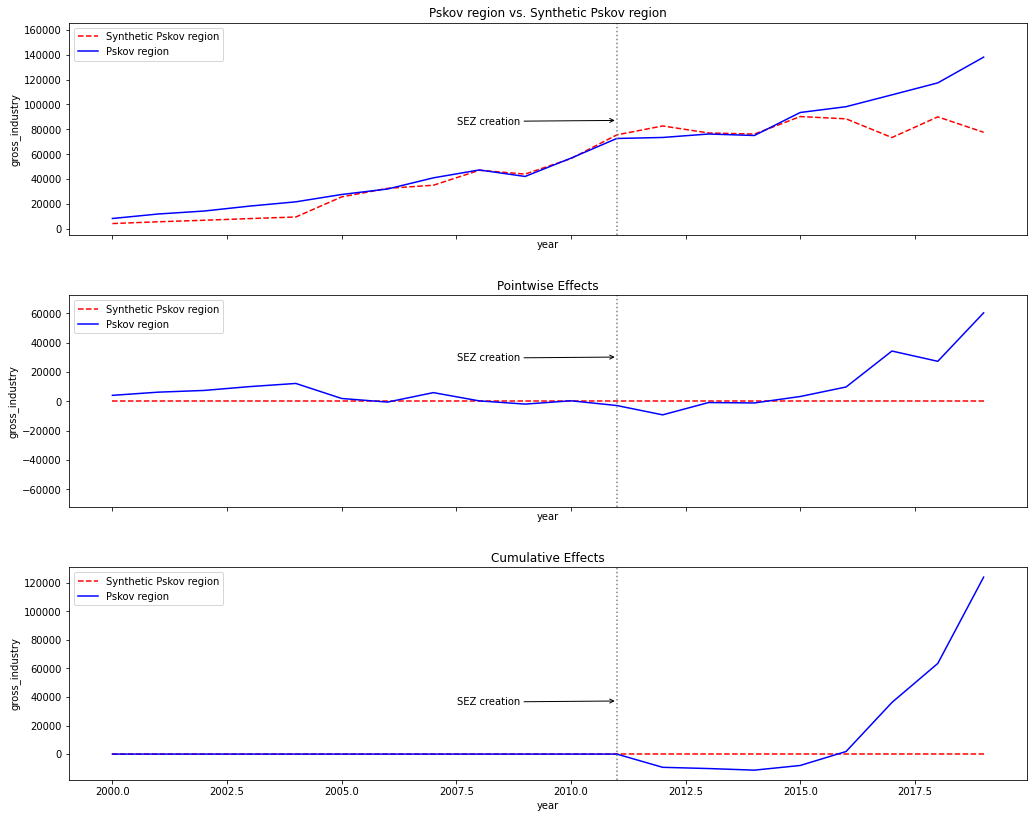

In [ ]:
sc_pskov_industry.plot(['original', 'pointwise', 'cumulative'], treated_label='Pskov region', synth_label='Synthetic Pskov region', treatment_label='SEZ creation')

In [ ]:
sc_pskov_industry.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Pskov region,5858.521695,26867.209085,4.586005


In [ ]:
sc_pskov_industry.original_data.comparison_df

,Pskov region,Synthetic Pskov region,WMAPE,Importance
gross_industry,32839.19,29245.16,41853.68,0.32
gross_export,192.21,1239.62,1206.45,0.08
price_indexes,116.45,127.52,11.07,0.30
population,719.16,460.33,343.63,0.20
investments,9790.45,3263.90,6526.56,0.00
fixed_assets,165673.42,46670.33,140826.95,0.00
grp_per_capita,72755.27,40811.86,44197.16,0.00
unemployment_rate,8.18,39.08,31.08,0.10


In [ ]:
sc_pskov_industry.original_data.weight_df

,Weight
The Republic of Ingushetia,0.712812
Tyumen region without autonomous districts,0.069621
The Republic of Buryatia,0.199340
Chukotsk Autonomous Okrug,0.018227


In [ ]:
data_for_pskov_industry = data_sc.copy(deep=True)

In [ ]:
data_for_pskov_industry = data_for_pskov_industry[(data_for_pskov_industry.region_name == 'The Republic of Ingushetia') |
                                                  (data_for_pskov_industry.region_name == 'Tyumen region without autonomous districts') |
                                                  (data_for_pskov_industry.region_name == 'The Republic of Buryatia') |
                                                  (data_for_pskov_industry.region_name == 'Chukotsk Autonomous Okrug') |
                                                  (data_for_pskov_industry.region_name == 'Pskov region')]

In [ ]:
data_for_pskov_industry.fillna(0, inplace=True)
data_for_pskov_industry.reset_index(drop=True, inplace=True)

In [ ]:
sc_pskov_industry_inspace = Synth(dataset=data_for_pskov_industry, outcome_var='gross_industry', 
                                id_var='region_name', time_var='year', treatment_period=2012, treated_unit='Pskov region', n_optim=50)

In [ ]:
sc_pskov_industry_inspace.original_data.weight_df

,Weight
The Republic of Ingushetia,0.394222
Tyumen region without autonomous districts,0.050113
The Republic of Buryatia,0.217813
Chukotsk Autonomous Okrug,0.337852


In [ ]:
sc_pskov_industry_inspace.in_space_placebo(n_optim=20)

/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


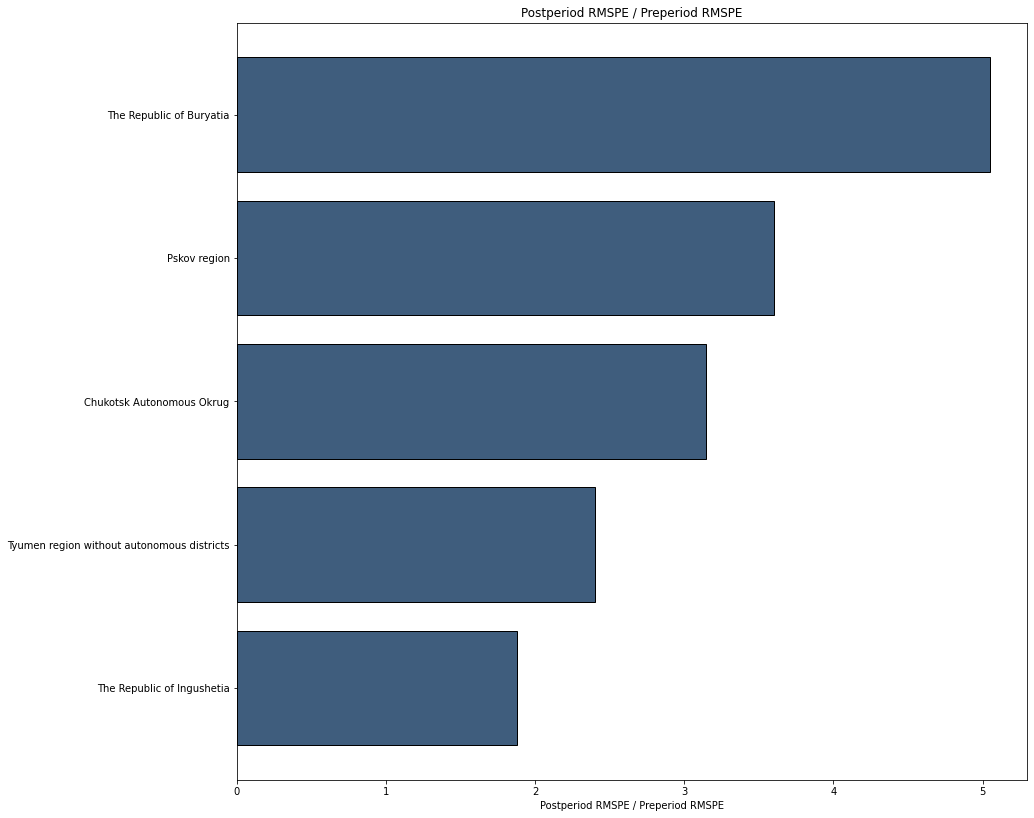

In [ ]:
sc_pskov_industry_inspace.plot(['rmspe ratio'])

##Kaluga region

In [ ]:
region_ = 'Kaluga region'
list_dependent_variables = ['grp_per_capita', 'investments', 'gross_industry']
prog_start = time.time()

synths_kaluga_list = []
run = 0

listsezreg_without_ = listsezreg_2019[:]
listsezreg_without_.remove(region_)

data_for_synth_ = data_sc.copy(deep=True)
  
for element__ in listsezreg_without_:
  data_for_synth_.drop(index=data_for_synth_[data_for_synth_.region_name == element__].index.tolist(), inplace=True)
  
data_for_synth_.fillna(0, inplace=True)

for dep in list_dependent_variables:
  
    
  try:
    synth_ = Synth(dataset=data_for_synth_, outcome_var=dep, id_var='region_name', time_var='year', treatment_period=int(sez[sez.sez_reg_en == region_].sez_year), treated_unit=region_, n_optim=50)
  except:
    print(f'error occured at run {run}')
    pass
  synths_kaluga_list.append(synth_)

  print(f'run: {run}, region: {region_}, dep: {dep}, n_optim: 50\n\t It took {(time.time() - prog_start) / 60} mins')
  run += 1

/usr/local/lib/python3.7/dist-packages/cvxpy/problems/problem.py:1338: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


run: 0, region: Kaluga region, dep: grp_per_capita, n_optim: 50
	 It took 12.165353377660116 mins
run: 1, region: Kaluga region, dep: investments, n_optim: 50
	 It took 28.30014174381892 mins
run: 2, region: Kaluga region, dep: gross_industry, n_optim: 50
	 It took 44.119717752933504 mins


In [ ]:
synths_kaluga_list

In [ ]:
sc_kaluga_grp = synths_kaluga_list[0]

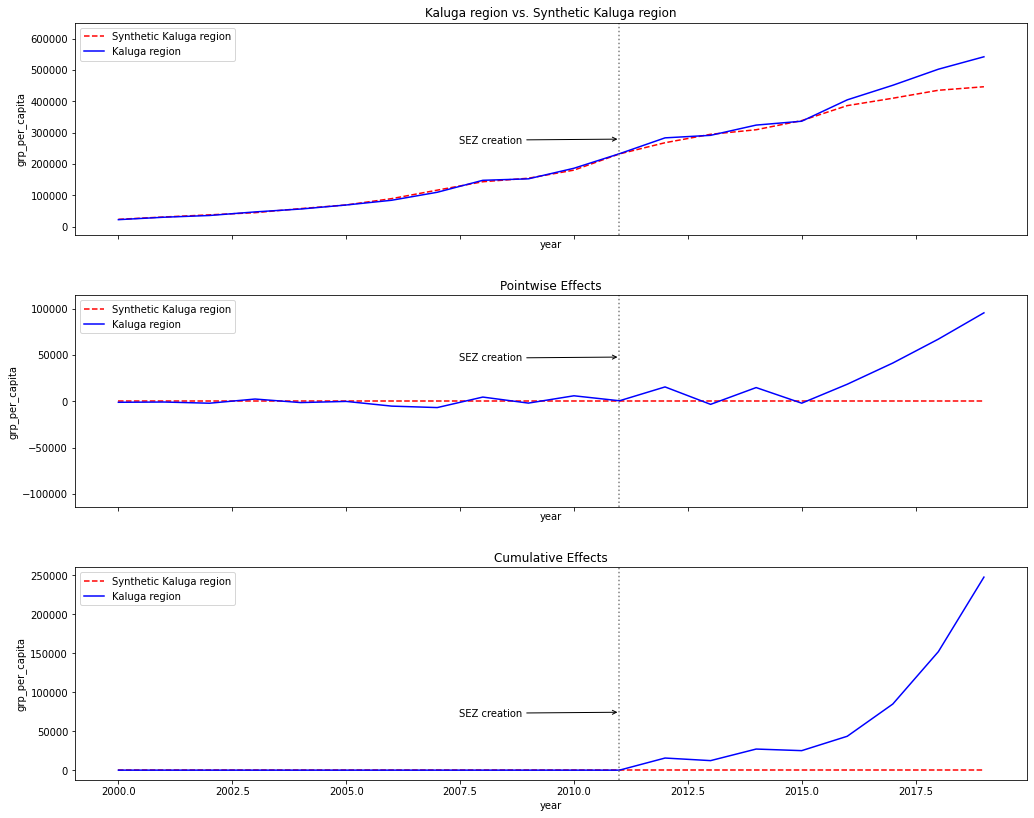

In [ ]:
sc_kaluga_grp.plot(['original', 'pointwise', 'cumulative'], treated_label='Kaluga region', synth_label='Synthetic Kaluga region', treatment_label='SEZ creation')

In [ ]:
sc_kaluga_grp.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Kaluga region,3504.346628,44952.055546,12.827514


In [ ]:
sc_kaluga_grp.original_data.comparison_df

,Kaluga region,Synthetic Kaluga region,WMAPE,Importance
gross_industry,119513.75,199430.77,119653.10,0.18
gross_export,202.71,3318.35,3153.57,0.09
price_indexes,116.19,116.57,4.74,0.14
population,1026.42,3606.39,2811.59,0.16
investments,32027.24,169741.48,150242.77,0.10
fixed_assets,258082.67,914711.34,742089.21,0.00
grp_per_capita,97893.43,98375.71,27257.65,0.18
unemployment_rate,6.09,13.80,7.71,0.14


In [ ]:
sc_kaluga_grp.original_data.weight_df

,Weight
Leningrad region,0.161764
Krasnodar region,0.623075
The Republic of Ingushetia,0.135845
Tyumen region without autonomous districts,0.031191
The Republic of Buryatia,0.048125


In [ ]:
data_for_kaluga_grp = data_sc.copy(deep=True)

In [ ]:
data_for_kaluga_grp = data_for_kaluga_grp[(data_for_kaluga_grp.region_name == 'The Republic of Ingushetia') |
                                          (data_for_kaluga_grp.region_name == 'Tyumen region without autonomous districts') |
                                          (data_for_kaluga_grp.region_name == 'Leningrad region') |
                                          (data_for_kaluga_grp.region_name == 'Krasnodar region') |
                                          (data_for_kaluga_grp.region_name == 'The Republic of Buryatia') |
                                          (data_for_kaluga_grp.region_name == 'Kaluga region')]

In [ ]:
data_for_kaluga_grp.fillna(0, inplace=True)
data_for_kaluga_grp.reset_index(drop=True, inplace=True)

In [ ]:
sc_kaluga_grp_inplace = Synth(dataset=data_for_kaluga_grp, outcome_var='grp_per_capita', 
                                id_var='region_name', time_var='year', treatment_period=2012, treated_unit='Kaluga region', n_optim=50)

In [ ]:
sc_kaluga_grp_inplace.original_data.weight_df

,Weight
Krasnodar region,0.923738
The Republic of Ingushetia,0.076262


In [ ]:
sc_kaluga_grp_inplace.in_space_placebo(n_optim=20)

/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


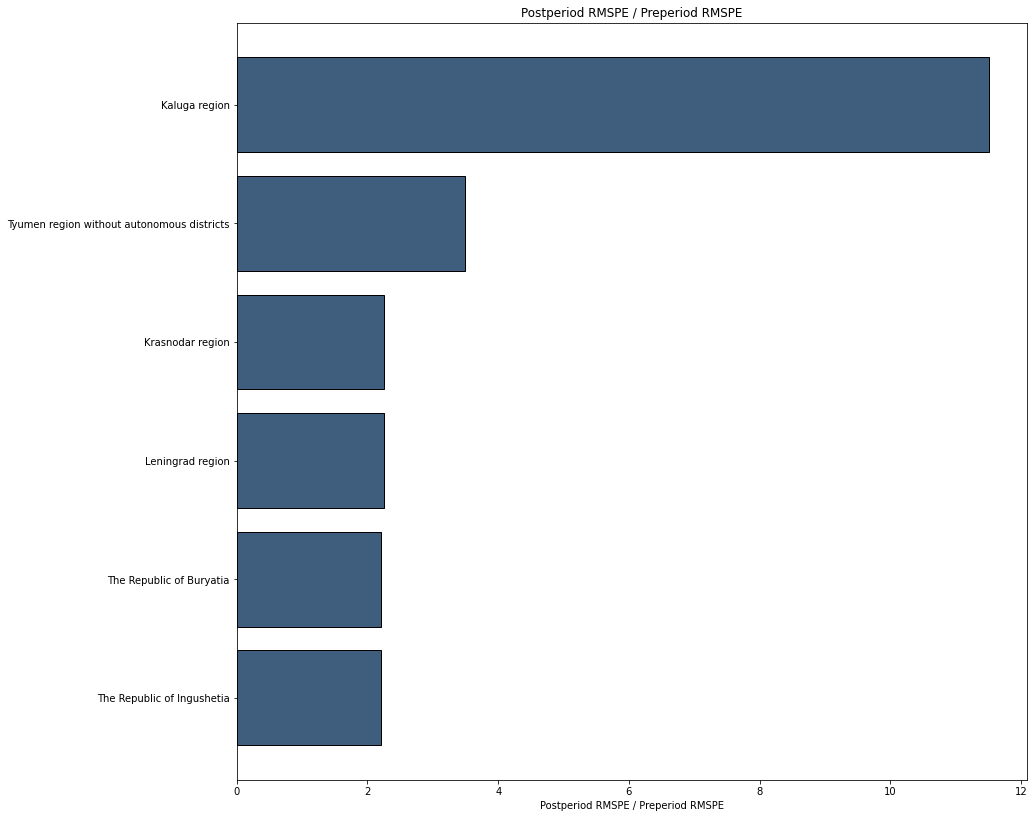

In [ ]:
sc_kaluga_grp_inplace.plot(['rmspe ratio'])

In [ ]:
sc_kaluga_invest = synths_kaluga_list[1]

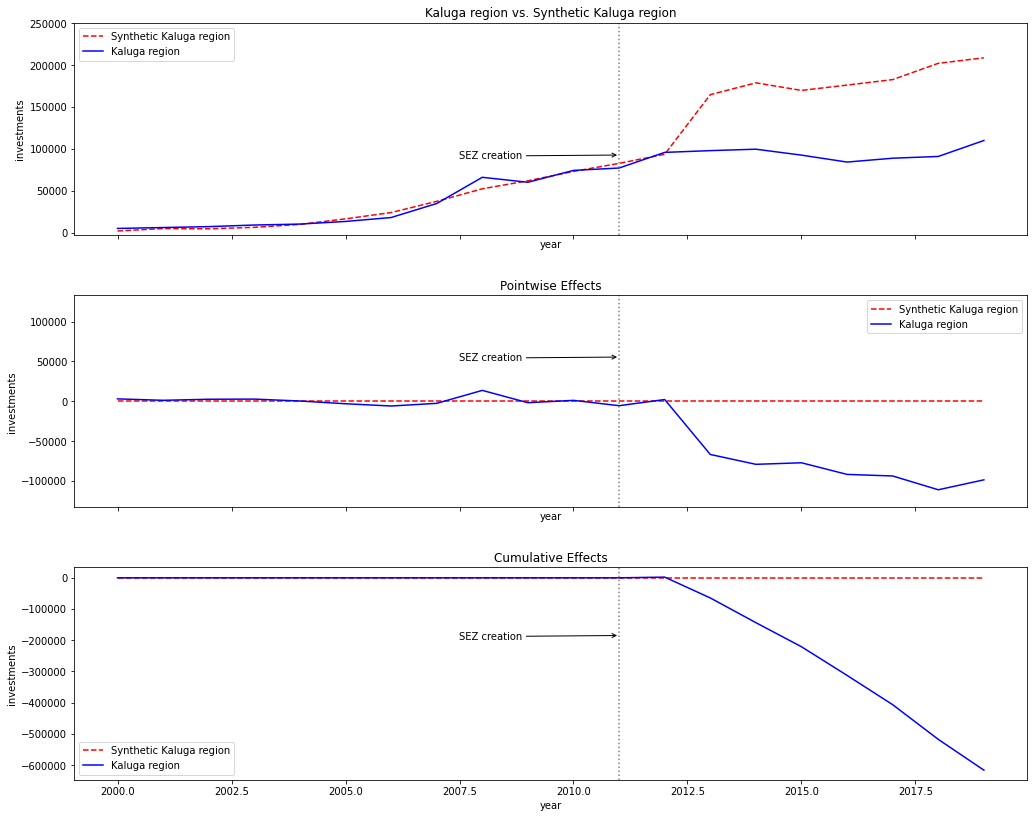

In [ ]:
sc_kaluga_invest.plot(['original', 'pointwise', 'cumulative'], treated_label='Kaluga region', synth_label='Synthetic Kaluga region', treatment_label='SEZ creation')

In [ ]:
sc_kaluga_invest.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Kaluga region,4994.730591,83633.061624,16.744259


In [ ]:
sc_kaluga_invest.original_data.comparison_df

,Kaluga region,Synthetic Kaluga region,WMAPE,Importance
gross_industry,119513.75,75930.70,118167.32,0.00
gross_export,202.71,3737.41,3681.13,0.01
price_indexes,116.19,124.93,8.74,0.00
population,1026.42,1995.55,1184.69,0.51
investments,32027.24,31525.48,24039.86,0.00
fixed_assets,258082.67,316968.05,142727.07,0.00
grp_per_capita,97893.43,44622.89,53270.54,0.42
unemployment_rate,6.09,22.65,16.55,0.05


In [ ]:
sc_kaluga_invest.original_data.weight_df

,Weight
The Republic of Dagestan,0.596401
The Republic of Ingushetia,0.180504
Tyumen region without autonomous districts,0.223095


In [ ]:
data_for_kaluga_invest = data_sc.copy(deep=True)

In [ ]:
data_for_kaluga_invest = data_for_kaluga_invest[(data_for_kaluga_invest.region_name == 'The Republic of Dagestan') |
                                                (data_for_kaluga_invest.region_name == 'Tyumen region without autonomous districts') |
                                                (data_for_kaluga_invest.region_name == 'The Republic of Ingushetia') |
                                                (data_for_kaluga_invest.region_name == 'Kaluga region')]

In [ ]:
data_for_kaluga_invest.fillna(0, inplace=True)
data_for_kaluga_invest.reset_index(drop=True, inplace=True)

In [ ]:
sc_kaluga_invest_inspace = Synth(dataset=data_for_kaluga_invest, outcome_var='investments', 
                                id_var='region_name', time_var='year', treatment_period=2012, treated_unit='Kaluga region', n_optim=50)

In [ ]:
sc_kaluga_invest_inspace.original_data.weight_df

,Weight
The Republic of Dagestan,0.601164
The Republic of Ingushetia,0.107526
Tyumen region without autonomous districts,0.291310


In [ ]:
sc_kaluga_invest_inspace.in_space_placebo(n_optim=20)

/usr/local/lib/python3.7/dist-packages/SyntheticControlMethods/plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


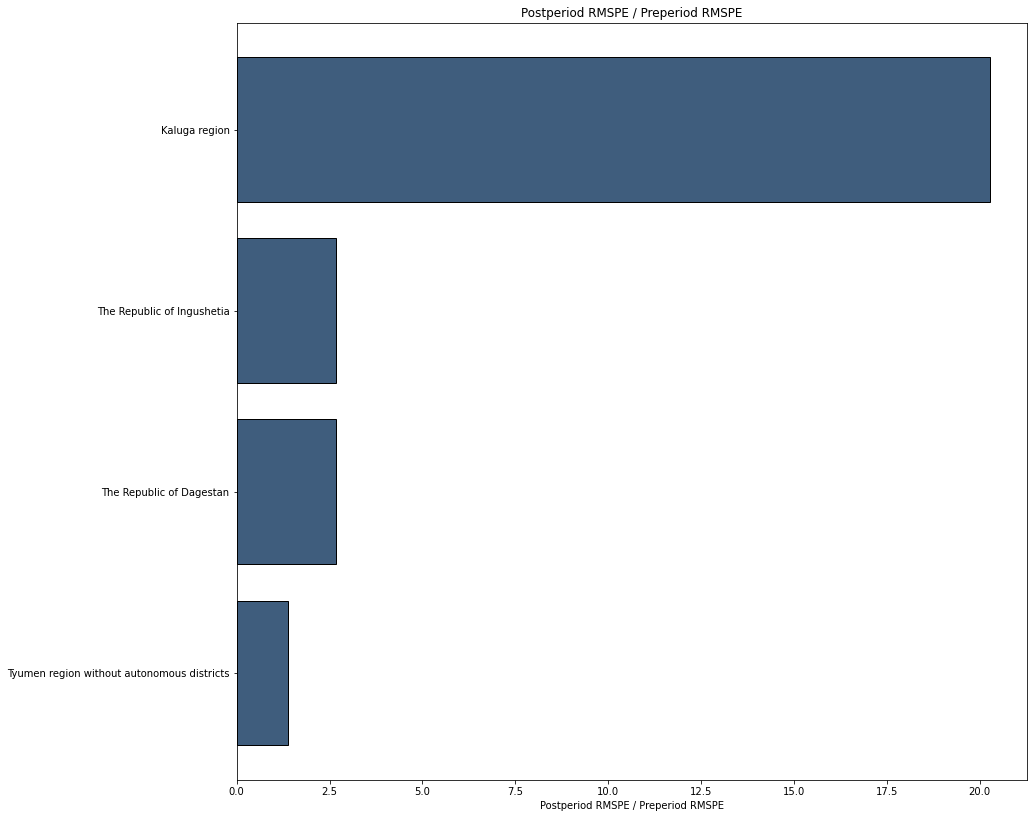

In [ ]:
sc_kaluga_invest_inspace.plot(['rmspe ratio'])

In [ ]:
sc_kaluga_industry = synths_kaluga_list[2]

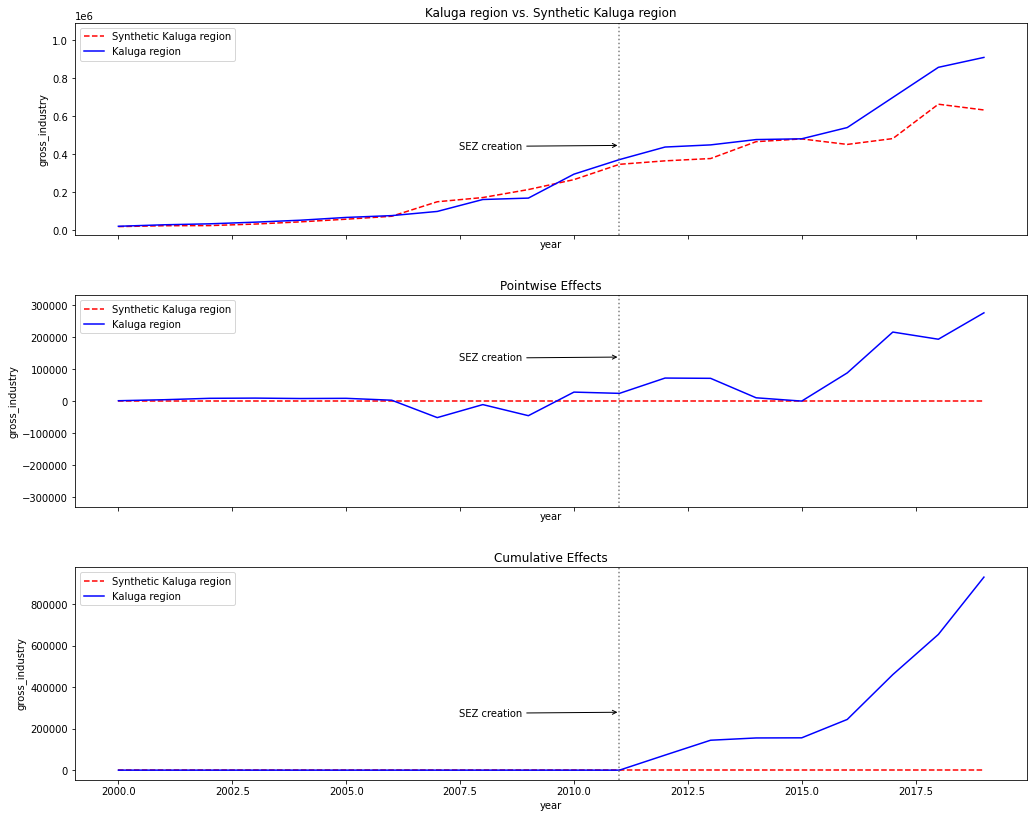

In [ ]:
sc_kaluga_industry.plot(['original', 'pointwise', 'cumulative'], treated_label='Kaluga region', synth_label='Synthetic Kaluga region', treatment_label='SEZ creation')

In [ ]:
sc_kaluga_industry.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Kaluga region,23355.056162,149663.416421,6.408181


In [ ]:
sc_kaluga_industry.original_data.comparison_df

,Kaluga region,Synthetic Kaluga region,WMAPE,Importance
gross_industry,119513.75,119955.11,61844.57,0.47
gross_export,202.71,2281.67,2117.21,0.12
price_indexes,116.19,121.80,5.67,0.12
population,1026.42,338.29,757.93,0.01
investments,32027.24,57022.14,30705.52,0.13
fixed_assets,258082.67,260393.61,165977.43,0.03
grp_per_capita,97893.43,910483.49,821338.00,0.00
unemployment_rate,6.09,9.51,3.42,0.12


In [ ]:
sc_kaluga_industry.original_data.weight_df

,Weight
Nenets Autonomous Okrug,0.448028
The Republic of Buryatia,0.097609
Kemerovo region,0.034922
Sakhalin region,0.419441
